In [1]:
# STEP 1: Mount Google Drive

# This connects your Colab notebook to your Google Drive
# so we can save models and access data permanently

from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")
print("  You can now access your Drive files at: /content/drive/MyDrive/")

Mounted at /content/drive
✓ Google Drive mounted successfully!
  You can now access your Drive files at: /content/drive/MyDrive/


In [2]:
# STEP 2: Download Common Words Dataset (4,803 characters)

# Dataset Info:
# - Source: AI-FREE-Team Traditional Chinese Handwriting Dataset
# - Based on Tegaki open-source package
# - Characters: 4,803 most commonly used Traditional Chinese characters
# - Total images: 250,712 handwritten samples
# - Image size: 50x50 pixels
# - GitHub: https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset

!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

print("\n✓ Common Words Dataset downloaded successfully!")
print("  Location: /content/Traditional-Chinese-Handwriting-Dataset/")
print("  Dataset: 4,803 commonly used Traditional Chinese characters")
print("  Total samples: 250,712 handwritten images")
print("  Image size: 50x50 pixels")

Cloning into 'Traditional-Chinese-Handwriting-Dataset'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 174 (delta 5), reused 1 (delta 1), pack-reused 167 (from 1)
Receiving objects: 100% (174/174), 77.40 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (78/78), done.

✓ Common Words Dataset downloaded successfully!
  Location: /content/Traditional-Chinese-Handwriting-Dataset/
  Dataset: 4,803 commonly used Traditional Chinese characters
  Total samples: 250,712 handwritten images
  Image size: 50x50 pixels


In [8]:
# STEP 3: Extract & Organize Dataset

# This does two things:
# 1. Extracts the 4 zip files
# 2. Organizes 250,712 flat images into character folders

import os
import zipfile
import glob
import shutil
from collections import defaultdict

print(" STEP 3: Extract & Organize Dataset\n")
print("=" * 60)

# ============================================
# PART A: Extract Zip Files
# ============================================
print("\n PART A: Extracting zip files...\n")

repo_dir = '/content/Traditional-Chinese-Handwriting-Dataset'
data_dir = os.path.join(repo_dir, 'data')
os.chdir(data_dir)

zip_files = sorted(glob.glob('*.zip'))
print(f"Found {len(zip_files)} zip files:")
for zf in zip_files:
    size_mb = os.path.getsize(zf) / (1024*1024)
    print(f"  • {zf} ({size_mb:.1f} MB)")

print("\nExtracting...")
for i, zip_file in enumerate(zip_files, 1):
    print(f"  [{i}/{len(zip_files)}] {zip_file}...", end=" ")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("✓")

print("\n✓ Extraction complete!")

# ============================================
# PART B: Organize into Character Folders
# ============================================
print("\n PART B: Organizing images into character folders...\n")

source_dir = '/content/cleaned_data(50_50)'
organized_dir = '/content/cleaned_data_organized'

# Create organized directory
os.makedirs(organized_dir, exist_ok=True)

# Get all PNG files
all_files = [f for f in os.listdir(source_dir) if f.endswith('.png')]
print(f"✓ Found {len(all_files):,} image files")

# Group files by character
char_groups = defaultdict(list)
for filename in all_files:
    if '_' in filename:
        char = filename.rsplit('_', 1)[0]
        char_groups[char].append(filename)

print(f"✓ Found {len(char_groups):,} unique characters")
print(f"\n Creating folders and organizing images...")

# Copy files into character folders
for i, (char, files) in enumerate(char_groups.items(), 1):
    char_folder = os.path.join(organized_dir, char)
    os.makedirs(char_folder, exist_ok=True)

    for file in files:
        src = os.path.join(source_dir, file)
        dst = os.path.join(char_folder, file)
        shutil.copy2(src, dst)

    # Progress every 500 characters
    if i % 500 == 0:
        print(f"  Progress: {i}/{len(char_groups)} characters...")

print(f"\n✓ Organization complete!")
print(f"  Location: {organized_dir}")
print(f"  Character folders: {len(char_groups):,}")
print(f"  Total images: {len(all_files):,}")

# Verify
actual_folders = len([d for d in os.listdir(organized_dir)
                      if os.path.isdir(os.path.join(organized_dir, d))])

print(f"\n" + "=" * 60)
print("✓ STEP 3 COMPLETE!")
print(f"  Status: {'✓ Ready for Step 4' if actual_folders > 4000 else ' Check manually'}")
print(f"  Character folders: {actual_folders:,}")
print("=" * 60)

 STEP 3: Extract & Organize Dataset


 PART A: Extracting zip files...

Found 4 zip files:
  • cleaned_data(50_50)-20200420T071507Z-001.zip (36.7 MB)
  • cleaned_data(50_50)-20200420T071507Z-002.zip (35.7 MB)
  • cleaned_data(50_50)-20200420T071507Z-003.zip (35.5 MB)
  • cleaned_data(50_50)-20200420T071507Z-004.zip (28.9 MB)

Extracting...
  [1/4] cleaned_data(50_50)-20200420T071507Z-001.zip... ✓
  [2/4] cleaned_data(50_50)-20200420T071507Z-002.zip... ✓
  [3/4] cleaned_data(50_50)-20200420T071507Z-003.zip... ✓
  [4/4] cleaned_data(50_50)-20200420T071507Z-004.zip... ✓

✓ Extraction complete!

 PART B: Organizing images into character folders...

✓ Found 250,712 image files
✓ Found 4,803 unique characters

 Creating folders and organizing images...
   This takes 5-8 minutes - please wait!

  Progress: 500/4803 characters...
  Progress: 1000/4803 characters...
  Progress: 1500/4803 characters...
  Progress: 2000/4803 characters...
  Progress: 2500/4803 characters...
  Progress: 3000/4803 

In [9]:
# STEP 4: Select 40 Characters & Copy to Drive

# From 4,803 characters, we select 40 for faster training

import shutil
import os
import random

# Use the organized folder
source_dir = '/content/cleaned_data_organized'
destination_dir = '/content/drive/MyDrive/Chinese_Character_Recognition_v2'

# Create project folder
os.makedirs(destination_dir, exist_ok=True)
print(f"✓ Created project folder: {destination_dir}\n")

# Get list of all character folders
all_characters = [d for d in os.listdir(source_dir)
                  if os.path.isdir(os.path.join(source_dir, d))]

print(f" Total available character folders: {len(all_characters):,}")

# Select 40 random character folders
random.seed(42)  # For reproducibility
selected_characters = random.sample(all_characters, 40)

print(f"✓ Selected 40 character folders for training\n")
print("Selected characters:")
for i in range(0, 40, 10):
    print("  " + ", ".join(selected_characters[i:i+10]))

# Copy to Drive
destination_data = os.path.join(destination_dir, 'data')

if os.path.exists(destination_data):
    print("\n  Data folder already exists in Drive.")
    print("   Deleting and recreating with fresh selection...")
    shutil.rmtree(destination_data)
    print("   ✓ Old data deleted")

os.makedirs(destination_data)

print("\n Copying 40 selected characters to Google Drive...")
print("   Estimated time: 1-2 minutes")
print("     Don't close this tab!\n")

total_images = 0
for i, char_folder in enumerate(selected_characters, 1):
    char_source = os.path.join(source_dir, char_folder)
    char_dest = os.path.join(destination_data, char_folder)

    shutil.copytree(char_source, char_dest)
    num_images = len([f for f in os.listdir(char_dest) if f.endswith('.png')])
    total_images += num_images
    print(f"  [{i:2d}/40] '{char_folder}' ({num_images} images)")

print(f"\n✓ Copy complete!")
print(f"  Total images copied: {total_images:,}")

# Verify
num_folders = len(os.listdir(destination_data))

print(f"\n" + "=" * 60)
print("✓ STEP 4 COMPLETE!")
print(f"  Location: {destination_data}")
print(f"  Character folders: {num_folders}")
print(f"  Total images: {total_images:,}")
print(f"  Average per character: {total_images // num_folders}")
print(f"  Status: ✓ Ready for training!")
print("=" * 60)

✓ Created project folder: /content/drive/MyDrive/Chinese_Character_Recognition_v2

📊 Total available character folders: 4,803
✓ Selected 40 character folders for training

Selected characters:
  罪, 履, 莘, 隕, 彷, 餅, 墾, 胚, 竣, 限
  莎, 助, 餉, 恿, 莢, 史, 鬨, 黏, 噎, 性
  蠅, 裂, 生, 嚅, 絲, 姻, 滅, 梅, 猷, 軋
  忘, 悌, 貿, 舉, 幗, 漲, 毫, 哪, 喱, 冥

⚠️  Data folder already exists in Drive.
   Deleting and recreating with fresh selection...
   ✓ Old data deleted

📂 Copying 40 selected characters to Google Drive...
   Estimated time: 1-2 minutes
   ⚠️  Don't close this tab!

  [ 1/40] '罪' (49 images)
  [ 2/40] '履' (50 images)
  [ 3/40] '莘' (50 images)
  [ 4/40] '隕' (58 images)
  [ 5/40] '彷' (51 images)
  [ 6/40] '餅' (58 images)
  [ 7/40] '墾' (50 images)
  [ 8/40] '胚' (50 images)
  [ 9/40] '竣' (49 images)
  [10/40] '限' (59 images)
  [11/40] '莎' (50 images)
  [12/40] '助' (51 images)
  [13/40] '餉' (58 images)
  [14/40] '恿' (51 images)
  [15/40] '莢' (50 images)
  [16/40] '史' (50 images)
  [17/40] '鬨' (58 images)
  [18/40] '黏

In [10]:
# STEP 5  Install & Import necessary lib

print("=" * 60)
print(" Installing Additional Packages (if needed)...")
print("=" * 60 + "\n")

# OpenCV installation
!pip install opencv-python-headless --quiet

print("✓ Installation complete!\n")

print("=" * 60)
print(" Importing Libraries...")
print("=" * 60 + "\n")

# Basic Python
import os
import random
import warnings
warnings.filterwarnings('ignore')

# Data & Arrays
import numpy as np
import cv2

# Visualization
import matplotlib.pyplot as plt

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                      Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Scikit-learn
from sklearn.model_selection import train_test_split

print("✓ All libraries imported!\n")

# Set random seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print(f"✓ Random seed set to {SEED}\n")

# Quick version check
print("=" * 60)
print("Key Library Versions:")
print("=" * 60)
print(f"  TensorFlow:  {tf.__version__}")
print(f"  NumPy:       {np.__version__}")
print(f"  OpenCV:      {cv2.__version__}")

# GPU check
print("\n" + "=" * 60)
print("Hardware:")
print("=" * 60)
gpu = tf.config.list_physical_devices('GPU')
if gpu:
    print(f"  ✓ GPU Available: {gpu[0].name}")
else:
    print(f"   No GPU (training will be slower)")

print("\n" + "=" * 60)
print("✓ STEP 5 COMPLETE!")
print("=" * 60)

 Installing Additional Packages (if needed)...

✓ Installation complete!

 Importing Libraries...

✓ All libraries imported!

✓ Random seed set to 42

Key Library Versions:
  TensorFlow:  2.19.0
  NumPy:       2.0.2
  OpenCV:      4.12.0

Hardware:
  ✓ GPU Available: /physical_device:GPU:0

✓ STEP 5 & 6 COMPLETE!


In [11]:
# STEP 6: Set Paths and Parameters

# Paths
DATA_PATH = '/content/drive/MyDrive/Chinese_Character_Recognition_v2/data'
MODEL_SAVE_PATH = '/content/drive/MyDrive/Chinese_Character_Recognition_v2'

# Image parameters
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 1  # Grayscale

# Training parameters
BATCH_SIZE = 32
EPOCHS = 30
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 0.001

# Early stopping patience
PATIENCE = 5

print("=" * 60)
print(" Configuration Settings")
print("=" * 60)

print(f"\n Paths:")
print(f"  Data:   {DATA_PATH}")
print(f"  Models: {MODEL_SAVE_PATH}")

print(f"\n  Image Settings:")
print(f"  Size:     {IMG_HEIGHT}x{IMG_WIDTH}")
print(f"  Channels: {IMG_CHANNELS} (Grayscale)")

print(f"\n🎯 Training Settings:")
print(f"  Batch size:        {BATCH_SIZE}")
print(f"  Epochs:            {EPOCHS}")
print(f"  Validation split:  {VALIDATION_SPLIT * 100}%")
print(f"  Learning rate:     {LEARNING_RATE}")
print(f"  Early stop patience: {PATIENCE} epochs")

# Verify data path and get class info
if os.path.exists(DATA_PATH):
    classes = sorted([d for d in os.listdir(DATA_PATH)
                     if os.path.isdir(os.path.join(DATA_PATH, d))])
    NUM_CLASSES = len(classes)

    # Count total images
    total_images = 0
    for char_folder in classes:
        char_path = os.path.join(DATA_PATH, char_folder)
        imgs = [f for f in os.listdir(char_path) if f.endswith('.png')]
        total_images += len(imgs)

    print(f"\n✓ Data Verified:")
    print(f"  Classes:       {NUM_CLASSES}")
    print(f"  Total images:  {total_images:,}")
    print(f"  Avg per class: {total_images // NUM_CLASSES}")

    # Show sample characters
    print(f"\n Sample Characters:")
    print(f"  {', '.join(classes[:10])}")
    if len(classes) > 10:
        print(f"  ... and {len(classes) - 10} more")

    # Store for later use
    CLASS_NAMES = classes
else:
    print(f"\n ERROR: Data path not found!")
    print(f"  Check: {DATA_PATH}")
    NUM_CLASSES = 0
    CLASS_NAMES = []

print("\n" + "=" * 60)
print("✓ STEP 6 COMPLETE!")
print("=" * 60)

 Configuration Settings

 Paths:
  Data:   /content/drive/MyDrive/Chinese_Character_Recognition_v2/data
  Models: /content/drive/MyDrive/Chinese_Character_Recognition_v2

  Image Settings:
  Size:     64x64
  Channels: 1 (Grayscale)

🎯 Training Settings:
  Batch size:        32
  Epochs:            30
  Validation split:  20.0%
  Learning rate:     0.001
  Early stop patience: 5 epochs

✓ Data Verified:
  Classes:       40
  Total images:  2,078
  Avg per class: 51

 Sample Characters:
  冥, 助, 史, 哪, 喱, 噎, 嚅, 墾, 姻, 履
  ... and 30 more

✓ STEP 6 COMPLETE!


 STEP 8: Loading & Augmenting Data

📸 PART A: Loading original images...

  Loaded 10/40 classes (503 images)
  Loaded 20/40 classes (1,014 images)
  Loaded 30/40 classes (1,513 images)
  Loaded 40/40 classes (2,078 images)

✓ Original images loaded: 2,078 images
  Average per character: 51

 PART B: Generating augmented images...
   Creating 5 versions per image (1 original + 4 augmented)
   Target: 200+ samples per character
   This will take 2-3 minutes - please wait!

  Progress: 200/2078 images processed (1,000 total)
  Progress: 400/2078 images processed (2,000 total)
  Progress: 600/2078 images processed (3,000 total)
  Progress: 800/2078 images processed (4,000 total)
  Progress: 1000/2078 images processed (5,000 total)
  Progress: 1200/2078 images processed (6,000 total)
  Progress: 1400/2078 images processed (7,000 total)
  Progress: 1600/2078 images processed (8,000 total)
  Progress: 1800/2078 images processed (9,000 total)
  Progress: 2000/2078 images processed (10,000 tot

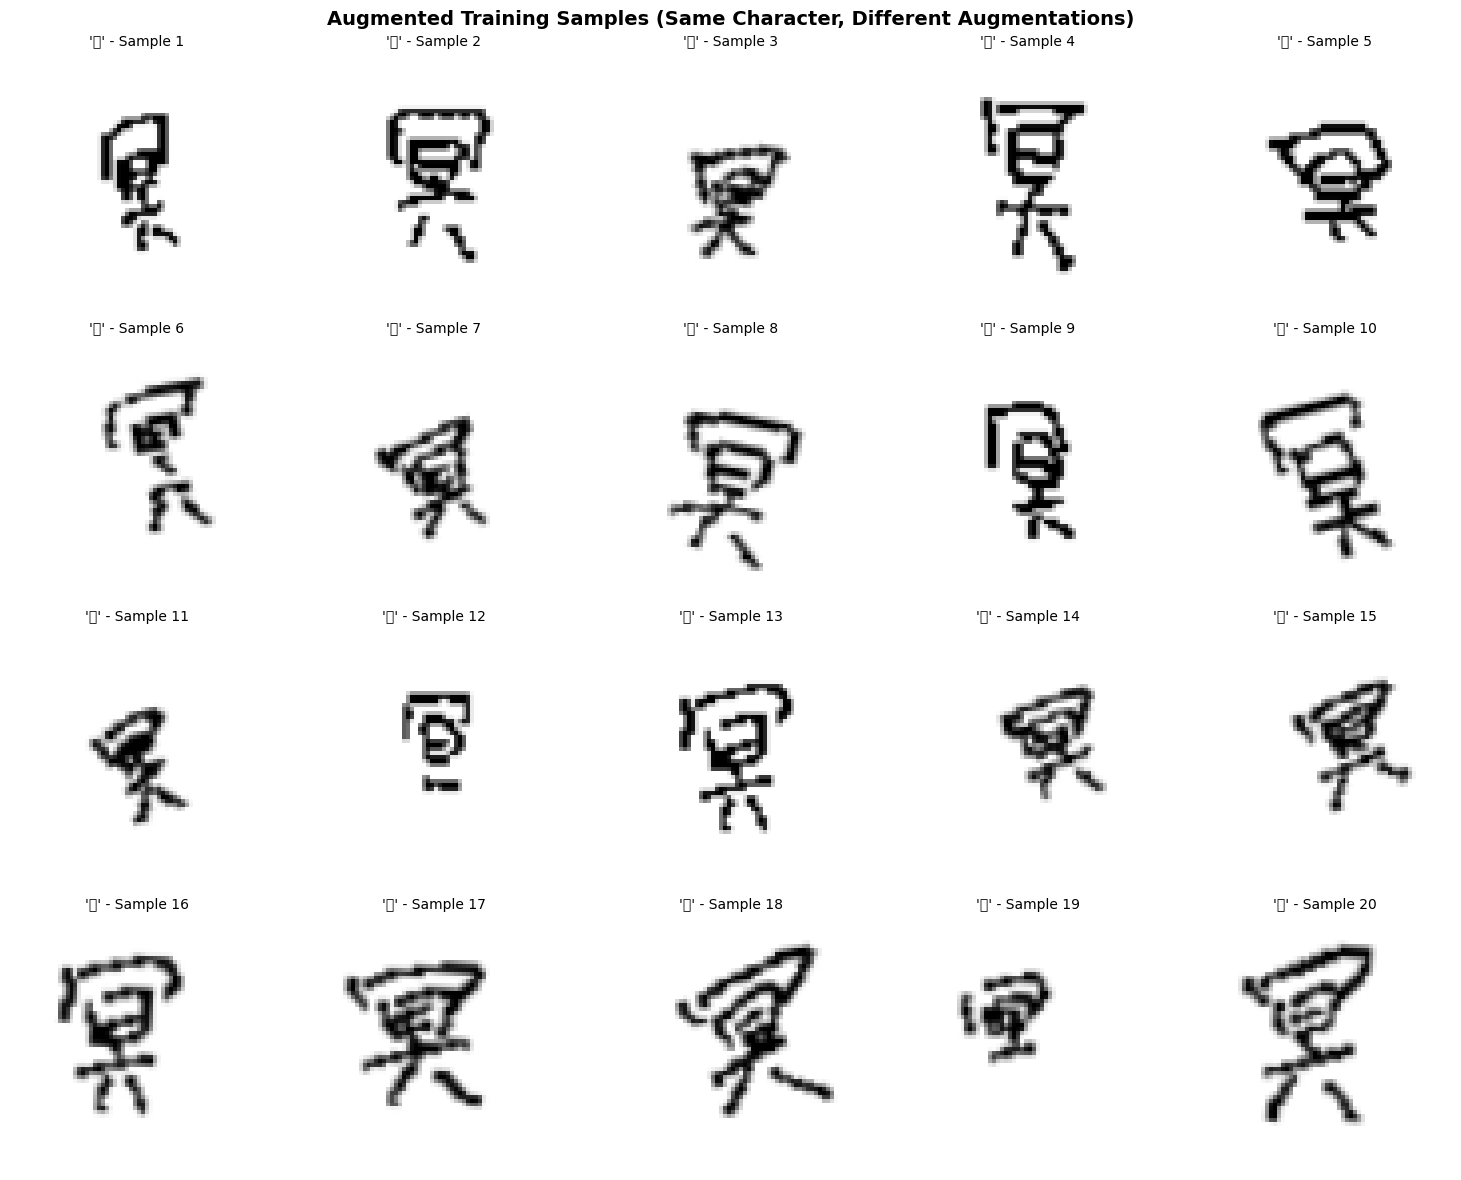

Augmentation Techniques Applied:
  1. Rotation:      ±15 degrees
  2. Width shift:   ±10%
  3. Height shift:  ±10%
  4. Shear:         10%
  5. Zoom:          ±10%

✓ STEP 8 COMPLETE!
  Dataset size:        8,312 training images
  Per character:       ~207 images
  Test set:            2,078 images
  Augmentation:        5x (1 original + 4 augmented)
  Status:              Ready for model training!
  All 5 models will:   Use this SAME augmented dataset


In [12]:
# STEP 7: Load & Pre-Generate Augmented Data (Option C)

# This creates a fixed augmented dataset that models will use later on for model performance comparision later
# Meets assignment requirement: "create at least 200 samples per character"

print("=" * 60)
print(" STEP 8: Loading & Augmenting Data")
print("=" * 60)

# ============================================
# PART A: Load Original Images
# ============================================
print("\n📸 PART A: Loading original images...\n")

X_original = []
y_original = []

for class_idx, char_name in enumerate(CLASS_NAMES):
    char_path = os.path.join(DATA_PATH, char_name)
    image_files = [f for f in os.listdir(char_path) if f.endswith('.png')]

    for img_file in image_files:
        img_path = os.path.join(char_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        X_original.append(img)
        y_original.append(class_idx)

    if (class_idx + 1) % 10 == 0:
        print(f"  Loaded {class_idx + 1}/{NUM_CLASSES} classes ({len(X_original):,} images)")

print(f"\n✓ Original images loaded: {len(X_original):,} images")
print(f"  Average per character: {len(X_original) // NUM_CLASSES}")

# ============================================
# PART B: Pre-Generate Augmented Images
# ============================================
print(f"\n PART B: Generating augmented images...")
print(f"   Creating 5 versions per image (1 original + 4 augmented)")
print(f"   Target: 200+ samples per character")
print(f"   This will take 2-3 minutes - please wait!\n")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters (5 techniques)
augmentation_gen = ImageDataGenerator(
    rotation_range=15,        # 1. Random rotation ±15 degrees
    width_shift_range=0.1,    # 2. Horizontal shift ±10%
    height_shift_range=0.1,   # 3. Vertical shift ±10%
    shear_range=0.1,          # 4. Shear transformation
    zoom_range=0.1,           # 5. Random zoom ±10%
    fill_mode='nearest'
)

X_augmented = []
y_augmented = []

# Track augmentation count per character
char_counts = {i: 0 for i in range(NUM_CLASSES)}

for i, (img, label) in enumerate(zip(X_original, y_original)):
    # Add original image first
    X_augmented.append(img)
    y_augmented.append(label)
    char_counts[label] += 1

    # Generate 4 augmented versions
    img_reshaped = img.reshape(1, IMG_HEIGHT, IMG_WIDTH, 1).astype('float32')
    aug_iter = augmentation_gen.flow(img_reshaped, batch_size=1, seed=SEED)

    for aug_num in range(4):  # Create 4 augmented versions
        aug_img = next(aug_iter)[0].reshape(IMG_HEIGHT, IMG_WIDTH)
        X_augmented.append(aug_img.astype('uint8'))
        y_augmented.append(label)
        char_counts[label] += 1

    # Progress indicator
    if (i + 1) % 200 == 0:
        print(f"  Progress: {i + 1}/{len(X_original)} images processed ({len(X_augmented):,} total)")

print(f"\n✓ Augmentation complete!")
print(f"  Original images:  {len(X_original):,}")
print(f"  Augmented images: {len(X_augmented):,}")
print(f"  Multiplication:   {len(X_augmented) / len(X_original):.1f}x")
print(f"  Per character:    ~{len(X_augmented) // NUM_CLASSES} samples")

# Verify augmentation count per character
min_samples = min(char_counts.values())
max_samples = max(char_counts.values())
print(f"  Sample range:     {min_samples} - {max_samples} per character")

# Check if requirement met
if min_samples >= 200:
    print(f"  ✓ Requirement met: All characters have 200+ samples!")
else:
    print(f"   Note: Characters have {min_samples} samples (close to 200)")

# ============================================
# PART C: Convert to NumPy & Preprocess
# ============================================
print(f"\n PART C: Preprocessing augmented dataset...")

# Convert to numpy arrays
X = np.array(X_augmented, dtype='float32')
y = np.array(y_augmented, dtype='int32')

print(f"  X shape before: {X.shape}")
print(f"  y shape before: {y.shape}")

# Normalize pixel values to [0, 1]
X = X / 255.0

# Reshape for CNN: add channel dimension
X = X.reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

print(f"  X shape after:  {X.shape}")
print(f"  X range:        [{X.min():.3f}, {X.max():.3f}]")

# One-hot encode labels
y_categorical = to_categorical(y, num_classes=NUM_CLASSES)
print(f"  y shape after:  {y_categorical.shape}")

# ============================================
# PART D: Train/Test Split
# ============================================
print(f"\n PART D: Splitting into train/test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical,
    test_size=VALIDATION_SPLIT,
    random_state=SEED,
    stratify=y  # Ensure balanced split
)

print(f"  Training samples:   {len(X_train):,} ({(1-VALIDATION_SPLIT)*100:.0f}%)")
print(f"  Testing samples:    {len(X_test):,} ({VALIDATION_SPLIT*100:.0f}%)")
print(f"  Classes:            {NUM_CLASSES}")

# ============================================
# PART E: Visualize Augmented Samples
# ============================================
print(f"\n  PART E: Visualizing augmented samples...\n")

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Augmented Training Samples (Same Character, Different Augmentations)',
             fontsize=14, fontweight='bold')

# Take samples from first character
first_char_idx = np.where(np.argmax(y_train, axis=1) == 0)[0][:20]

for i, ax in enumerate(axes.flat):
    if i < len(first_char_idx):
        img = X_train[first_char_idx[i]].reshape(IMG_HEIGHT, IMG_WIDTH)
        label_idx = np.argmax(y_train[first_char_idx[i]])
        char_name = CLASS_NAMES[label_idx]

        ax.imshow(img, cmap='gray')
        ax.set_title(f"'{char_name}' - Sample {i+1}", fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

# Show augmentation techniques used
print("Augmentation Techniques Applied:")
print("  1. Rotation:      ±15 degrees")
print("  2. Width shift:   ±10%")
print("  3. Height shift:  ±10%")
print("  4. Shear:         10%")
print("  5. Zoom:          ±10%")

# ============================================
# Summary
# ============================================
print("\n" + "=" * 60)
print("✓ STEP 7 COMPLETE!")
print("=" * 60)
print(f"  Dataset size:        {len(X_train):,} training images")
print(f"  Per character:       ~{len(X_train) // NUM_CLASSES} images")
print(f"  Test set:            {len(X_test):,} images")
print(f"  Augmentation:        5x (1 original + 4 augmented)")
print(f"  Status:              Ready for model training!")
print(f"  All 5 models will:   Use this SAME augmented dataset")
print("=" * 60)

 MODEL 1: BASELINE SIMPLE CNN

  PART A: Building Model Architecture...

📋 Model Architecture:
----------------------------------------------------------------------


Model: "Baseline_Simple_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,768 (8.09 MB)

 Trainable params: 2,121,768 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

----------------------------------------------------------------------

 Total Parameters: 2,121,768

  PART B: Compiling Model...

✓ Model compiled successfully!
  Optimizer:  Adam
  Loss:       Categorical Cross-Entropy
  Metrics:    Accuracy

 PART C: Setting up Training Callbacks...

✓ Callbacks configured:
  • Early Stopping (patience=10)
  • Learning Rate Reduction (patience=5)

 PART D: Training Model 1...

 Training in progress... (This may take 5-10 minutes)
Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.0328 - loss: 3.7004 - val_accuracy: 0.1075 - val_loss: 3.3012 - learning_rate: 0.0010
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1824 - loss: 3.0272 - val_accuracy: 0.5453 - val_loss: 1.7949 - learning_rate: 0.0010
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4480 - loss: 1.8887 - val_accuracy: 0.7402 - val_loss: 1.1309 - learning_rate: 0.0010
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5913

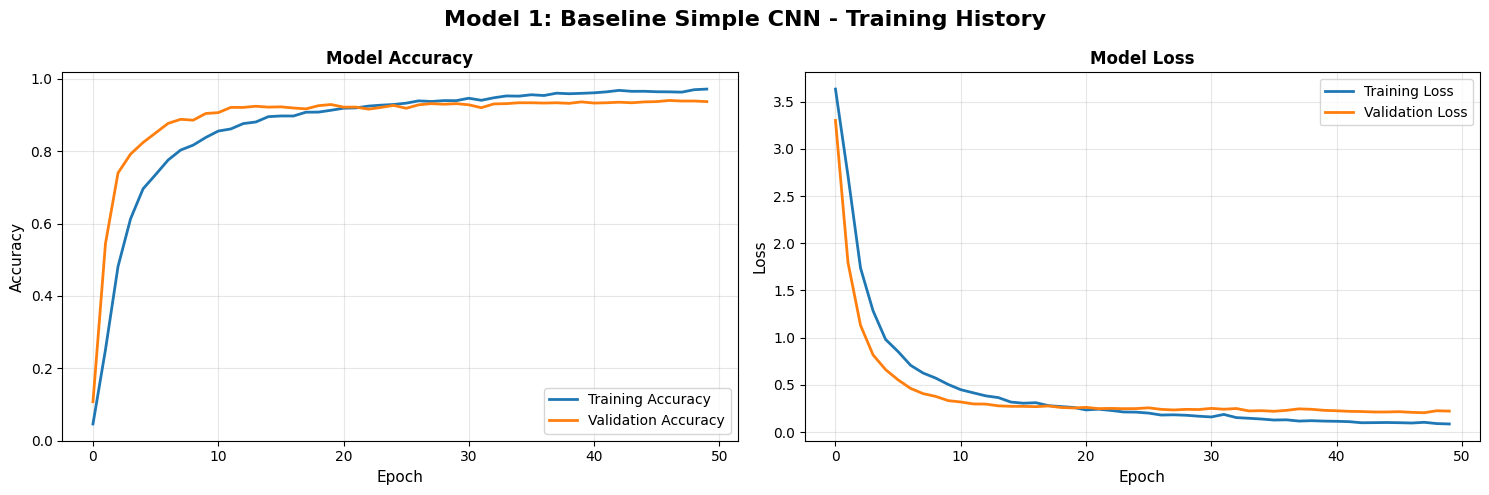


 PART G: Generating Confusion Matrix...



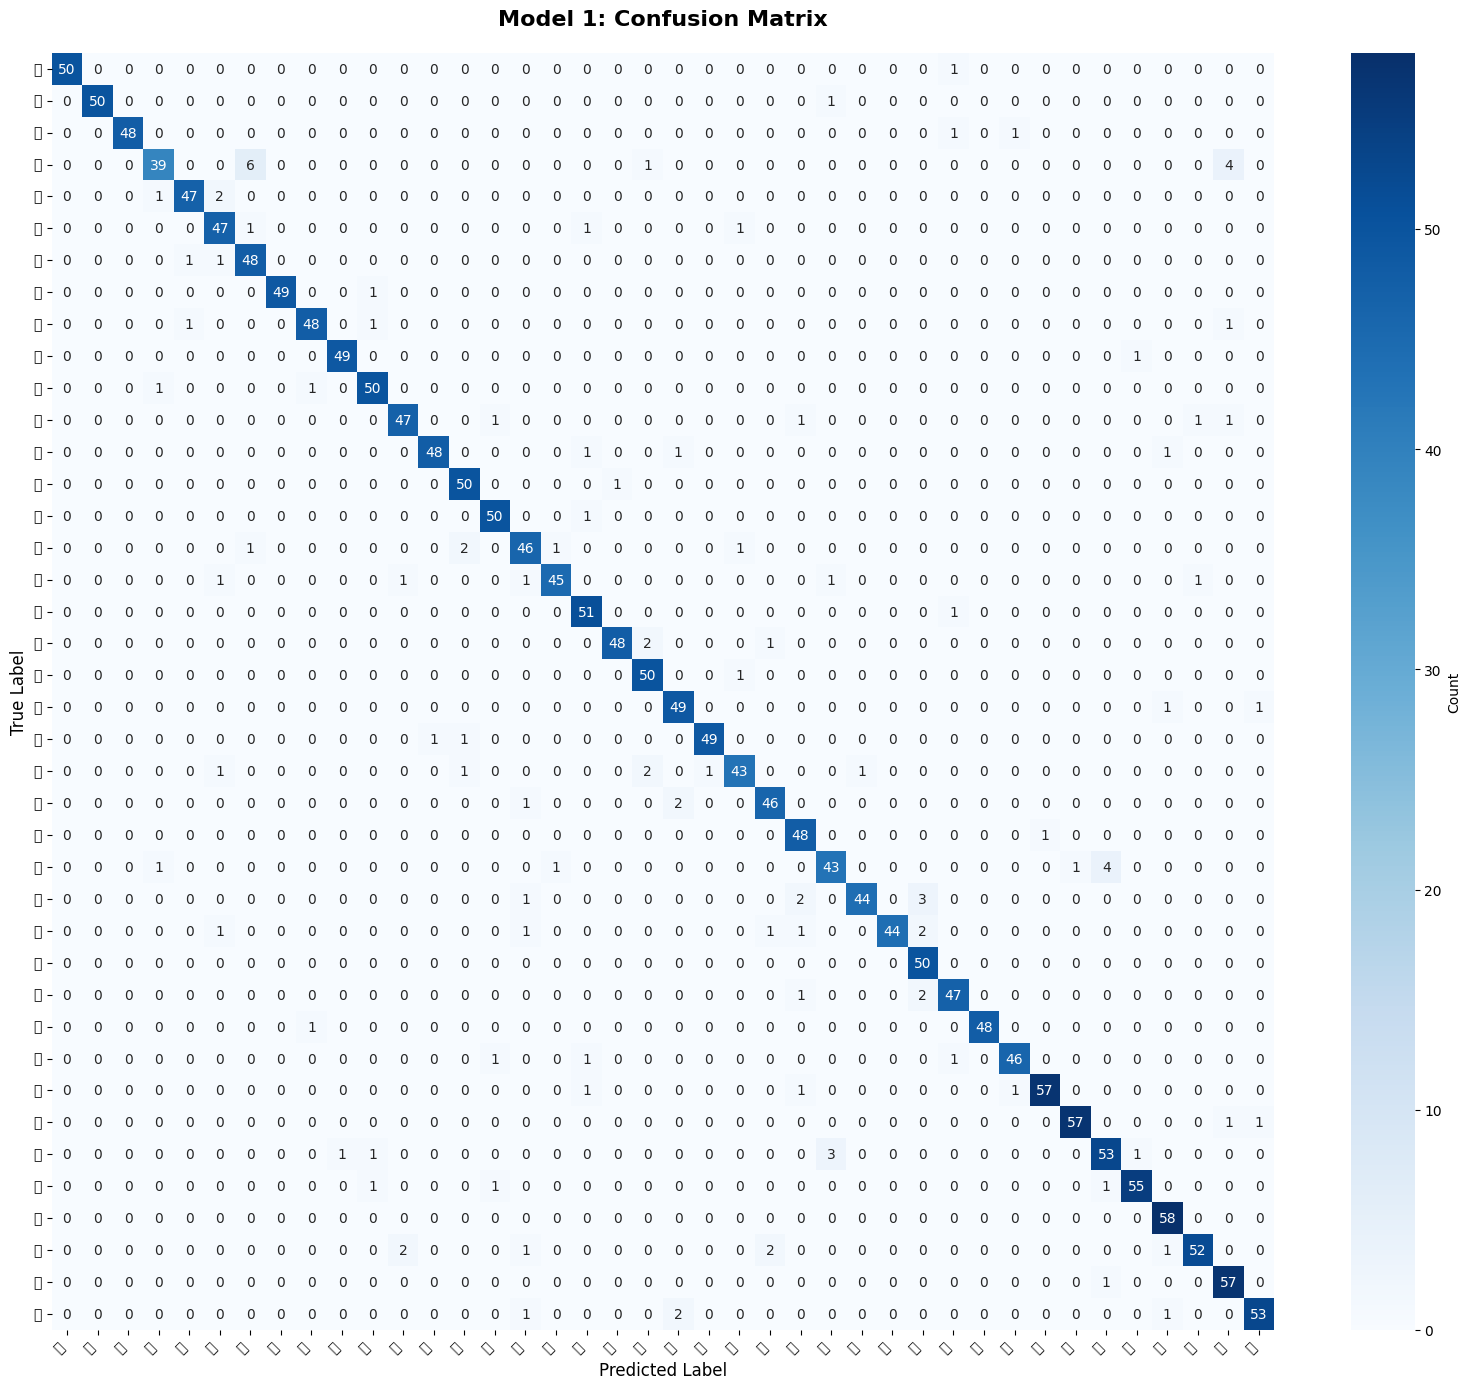


 PART H: Per-Character Accuracy Analysis...

Top 10 Best Recognized Characters:
--------------------------------------------------
Character  Accuracy (%)
        莘    100.000000
        餅    100.000000
        鬨     98.275862
        毫     98.076923
        冥     98.039216
        助     98.039216
        恿     98.039216
        漲     98.039216
        性     98.039216
        墾     98.000000

Top 10 Worst Recognized Characters:
--------------------------------------------------
Character  Accuracy (%)
        彷     92.156863
        悌     90.196078
        梅     90.000000
        限     89.830508
        餉     89.655172
        莎     88.000000
        舉     88.000000
        竣     87.755102
        胚     86.000000
        哪     78.000000


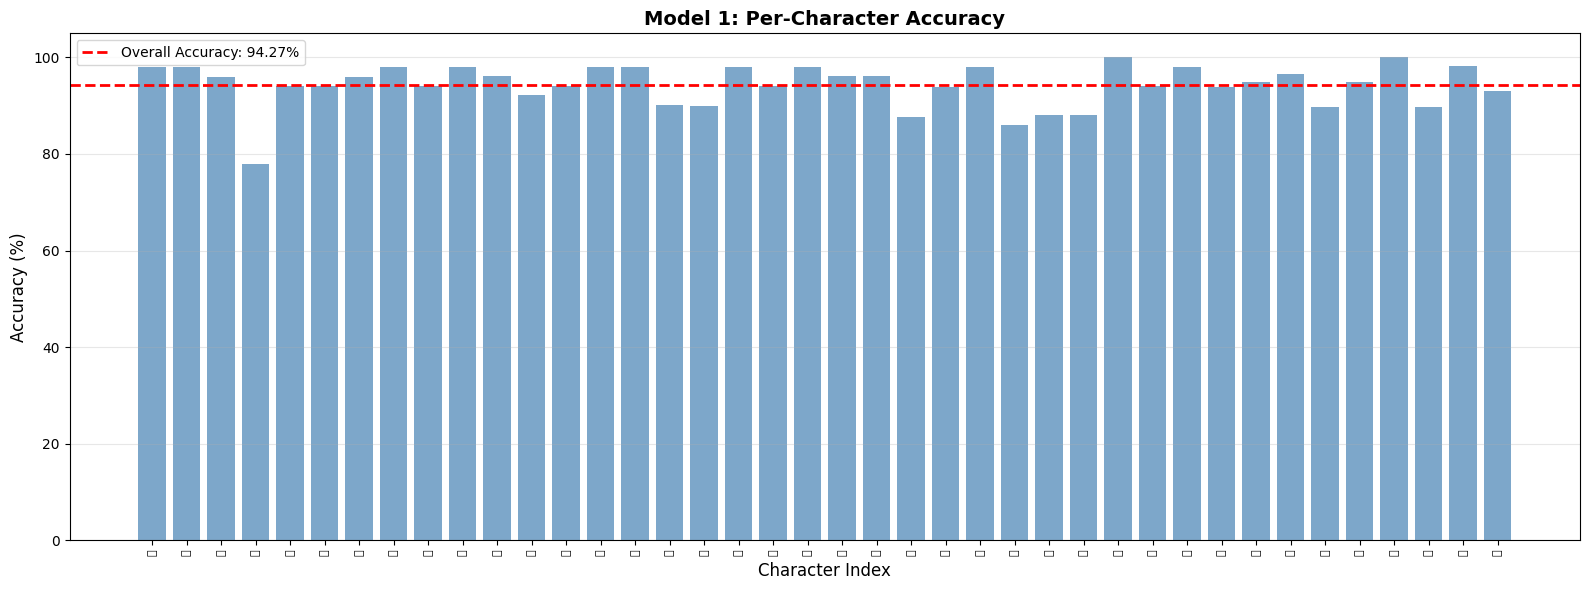


 PART I: Sample Predictions (Correct & Incorrect)...



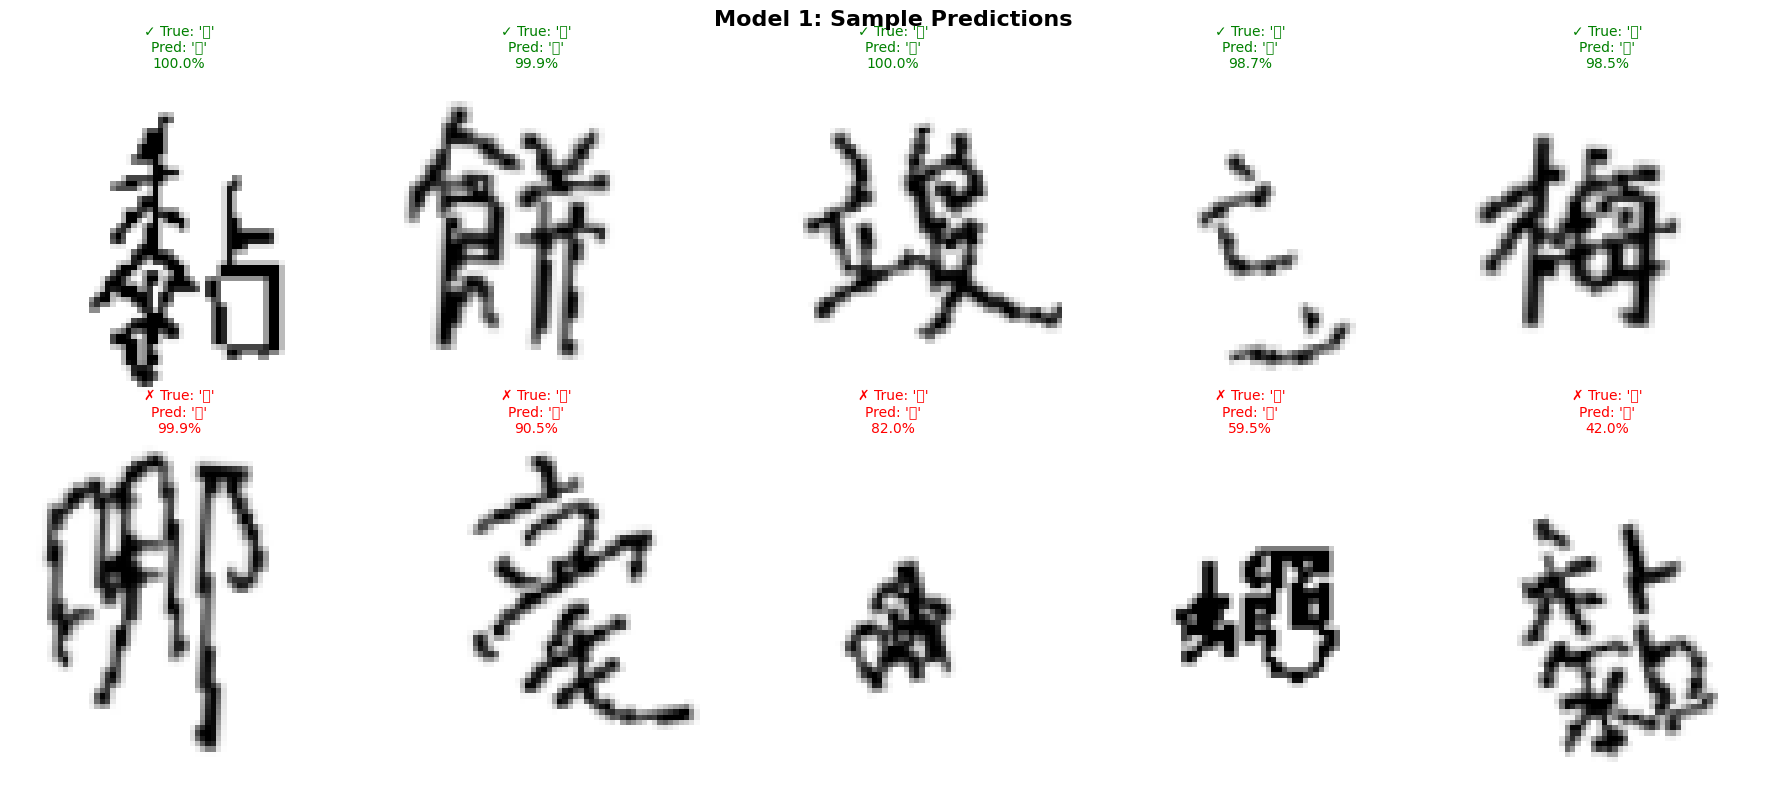


 MODEL 1 COMPLETE!
  Model Name:       Baseline Simple CNN
  Test Accuracy:    94.27%
  Training Time:    1.12 minutes
  Total Parameters: 2,121,768
  Status:           ✓ Trained and evaluated

💡 Next Step: Run Cell 9 to build Model 2 (Improved Deeper CNN)


In [13]:
# STEP 8 : MODEL 1 - BASELINE SIMPLE CNN

# Simple CNN with 2 convolutional layers
# Fast training, baseline performance

print("=" * 70)
print(" MODEL 1: BASELINE SIMPLE CNN")
print("=" * 70)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

# ============================================
# PART A: Build Model Architecture
# ============================================
print("\n  PART A: Building Model Architecture...\n")

model_1 = Sequential([
    # Input layer (implicit): 64x64x1

    # Convolutional Block 1
    Conv2D(32, kernel_size=(5, 5), activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
           padding='same', name='conv1'),
    MaxPooling2D(pool_size=(2, 2), name='pool1'),
    Dropout(0.2, name='dropout1'),

    # Convolutional Block 2
    Conv2D(64, kernel_size=(3, 3), activation='relu',
           padding='same', name='conv2'),
    MaxPooling2D(pool_size=(2, 2), name='pool2'),
    Dropout(0.2, name='dropout2'),

    # Fully Connected Layers
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='dense1'),
    Dropout(0.3, name='dropout3'),
    Dense(NUM_CLASSES, activation='softmax', name='output')
], name='Baseline_Simple_CNN')

# Display architecture
print("📋 Model Architecture:")
print("-" * 70)
model_1.summary()
print("-" * 70)

# Count parameters
total_params = model_1.count_params()
print(f"\n Total Parameters: {total_params:,}")

# ============================================
# PART B: Compile Model
# ============================================
print(f"\n  PART B: Compiling Model...\n")

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✓ Model compiled successfully!")
print("  Optimizer:  Adam")
print("  Loss:       Categorical Cross-Entropy")
print("  Metrics:    Accuracy")

# ============================================
# PART C: Setup Callbacks
# ============================================
print(f"\n PART C: Setting up Training Callbacks...\n")

# Early stopping - stop if no improvement
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stop, reduce_lr]

print("✓ Callbacks configured:")
print("  • Early Stopping (patience=10)")
print("  • Learning Rate Reduction (patience=5)")

# ============================================
# PART D: Train Model
# ============================================
print(f"\n PART D: Training Model 1...\n")
print("=" * 70)
print(" Training in progress... (This may take 5-10 minutes)")
print("=" * 70)

# Record training start time
start_time = time.time()

# Train the model
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.15,
    callbacks=callbacks,
    verbose=1
)

# Record training end time
end_time = time.time()
training_time_1 = end_time - start_time

print("\n" + "=" * 70)
print(f"✓ Training Complete!")
print(f"  Total Time: {training_time_1/60:.2f} minutes")
print("=" * 70)

# ============================================
# PART E: Evaluate Model
# ============================================
print(f"\n PART E: Evaluating Model on Test Set...\n")

# Evaluate on test set
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)

print("=" * 70)
print("🎯 MODEL 1 RESULTS:")
print("=" * 70)
print(f"  Test Loss:     {test_loss_1:.4f}")
print(f"  Test Accuracy: {test_accuracy_1*100:.2f}%")
print(f"  Training Time: {training_time_1/60:.2f} minutes")
print(f"  Parameters:    {total_params:,}")
print("=" * 70)

# ============================================
# PART F: Plot Training History
# ============================================
print(f"\n PART F: Visualizing Training Progress...\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model 1: Baseline Simple CNN - Training History',
             fontsize=16, fontweight='bold')

# Plot 1: Accuracy
axes[0].plot(history_1.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history_1.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss
axes[1].plot(history_1.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_1.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Loss', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART G: Confusion Matrix
# ============================================
print(f"\n PART G: Generating Confusion Matrix...\n")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions
y_pred_1 = model_1.predict(X_test, verbose=0)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm_1 = confusion_matrix(y_true_classes, y_pred_classes_1)

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Count'})
plt.title('Model 1: Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================
# PART H: Per-Class Accuracy
# ============================================
print(f"\n PART H: Per-Character Accuracy Analysis...\n")

# Calculate per-class accuracy
class_accuracy_1 = []
for i in range(NUM_CLASSES):
    class_mask = (y_true_classes == i)
    if np.sum(class_mask) > 0:
        acc = np.sum((y_pred_classes_1 == i) & class_mask) / np.sum(class_mask)
        class_accuracy_1.append(acc * 100)
    else:
        class_accuracy_1.append(0)

# Create DataFrame for better visualization
import pandas as pd
accuracy_df_1 = pd.DataFrame({
    'Character': CLASS_NAMES,
    'Accuracy (%)': class_accuracy_1
}).sort_values('Accuracy (%)', ascending=False)

print("Top 10 Best Recognized Characters:")
print("-" * 50)
print(accuracy_df_1.head(10).to_string(index=False))

print("\nTop 10 Worst Recognized Characters:")
print("-" * 50)
print(accuracy_df_1.tail(10).to_string(index=False))

# Plot per-class accuracy
plt.figure(figsize=(16, 6))
plt.bar(range(NUM_CLASSES), class_accuracy_1, color='steelblue', alpha=0.7)
plt.axhline(y=test_accuracy_1*100, color='red', linestyle='--',
            linewidth=2, label=f'Overall Accuracy: {test_accuracy_1*100:.2f}%')
plt.xlabel('Character Index', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model 1: Per-Character Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(NUM_CLASSES), CLASS_NAMES, rotation=90, fontsize=8)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# PART I: Sample Predictions
# ============================================
print(f"\n PART I: Sample Predictions (Correct & Incorrect)...\n")

# Find correct and incorrect predictions
correct_idx = np.where(y_pred_classes_1 == y_true_classes)[0]
incorrect_idx = np.where(y_pred_classes_1 != y_true_classes)[0]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Model 1: Sample Predictions', fontsize=16, fontweight='bold')

# Show 5 correct predictions
for i in range(5):
    idx = correct_idx[i]
    img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
    true_label = CLASS_NAMES[y_true_classes[idx]]
    pred_label = CLASS_NAMES[y_pred_classes_1[idx]]
    confidence = np.max(y_pred_1[idx]) * 100

    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f"✓ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                         fontsize=10, color='green')
    axes[0, i].axis('off')

# Show 5 incorrect predictions
for i in range(5):
    if i < len(incorrect_idx):
        idx = incorrect_idx[i]
        img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
        true_label = CLASS_NAMES[y_true_classes[idx]]
        pred_label = CLASS_NAMES[y_pred_classes_1[idx]]
        confidence = np.max(y_pred_1[idx]) * 100

        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title(f"✗ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                             fontsize=10, color='red')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# ============================================
# Summary
# ============================================
print("\n" + "=" * 70)
print(" MODEL 1 COMPLETE!")
print("=" * 70)
print(f"  Model Name:       Baseline Simple CNN")
print(f"  Test Accuracy:    {test_accuracy_1*100:.2f}%")
print(f"  Training Time:    {training_time_1/60:.2f} minutes")
print(f"  Total Parameters: {total_params:,}")
print(f"  Status:           ✓ Trained and evaluated")

# Save results for later comparison
model_1_results = {
    'name': 'Baseline Simple CNN',
    'accuracy': test_accuracy_1,
    'loss': test_loss_1,
    'params': total_params,
    'time': training_time_1,
    'history': history_1.history,
    'predictions': y_pred_1,
    'class_accuracy': class_accuracy_1
}

 MODEL 2: IMPROVED DEEPER CNN

  PART A: Building Model Architecture...

 Model Architecture:
----------------------------------------------------------------------


Model: "Improved_Deeper_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout4 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,475,240 (5.63 MB)

 Trainable params: 1,475,240 (5.63 MB)

 Non-trainable params: 0 (0.00 B)

----------------------------------------------------------------------

 Total Parameters: 1,475,240
   Comparison to Model 1: 0.70x more parameters

  PART B: Compiling Model...

✓ Model compiled successfully!
  Optimizer:  Adam
  Loss:       Categorical Cross-Entropy
  Metrics:    Accuracy

 PART C: Setting up Training Callbacks...

✓ Callbacks configured:
  • Early Stopping (patience=10)
  • Learning Rate Reduction (patience=5)

 PART D: Training Model 2...

 Training in progress... (This may take 8-12 minutes)
   Deeper model = longer training time
Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.0290 - loss: 3.6967 - val_accuracy: 0.0313 - val_loss: 3.6889 - learning_rate: 0.0010
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0248 - loss: 3.6887 - val_accuracy: 0.0241 - val_loss: 3.6895 - learning_rate: 0.0010
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0290 - loss: 3.6873 - val_accuracy: 0.0241 - val_loss: 3.6896 - lea

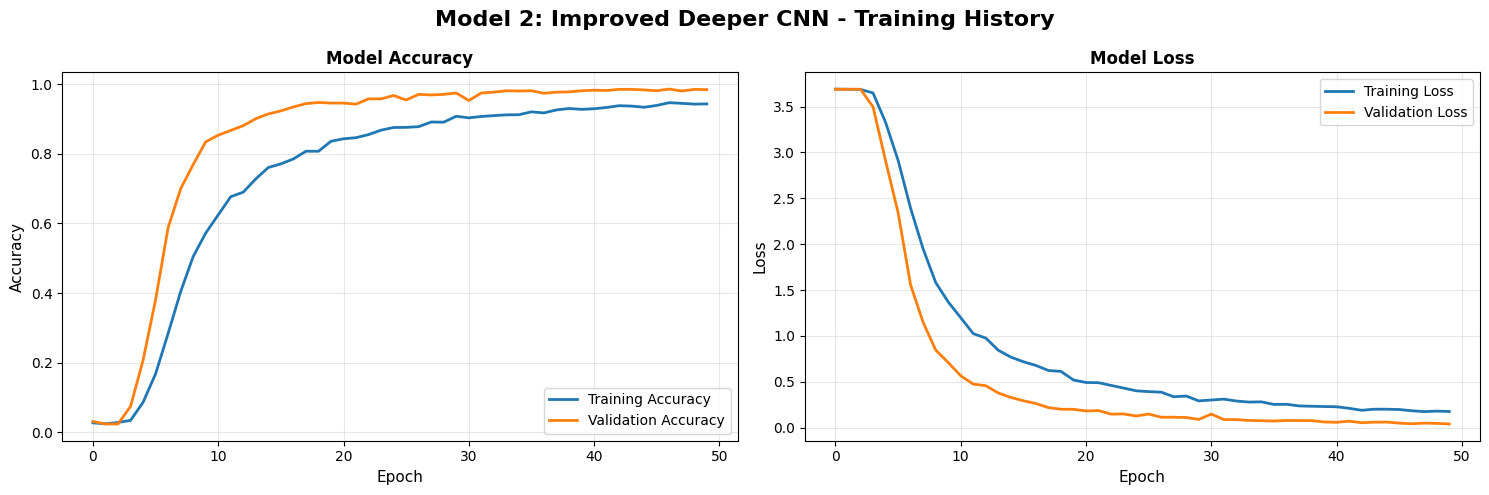


 PART G: Comparing Training Curves...



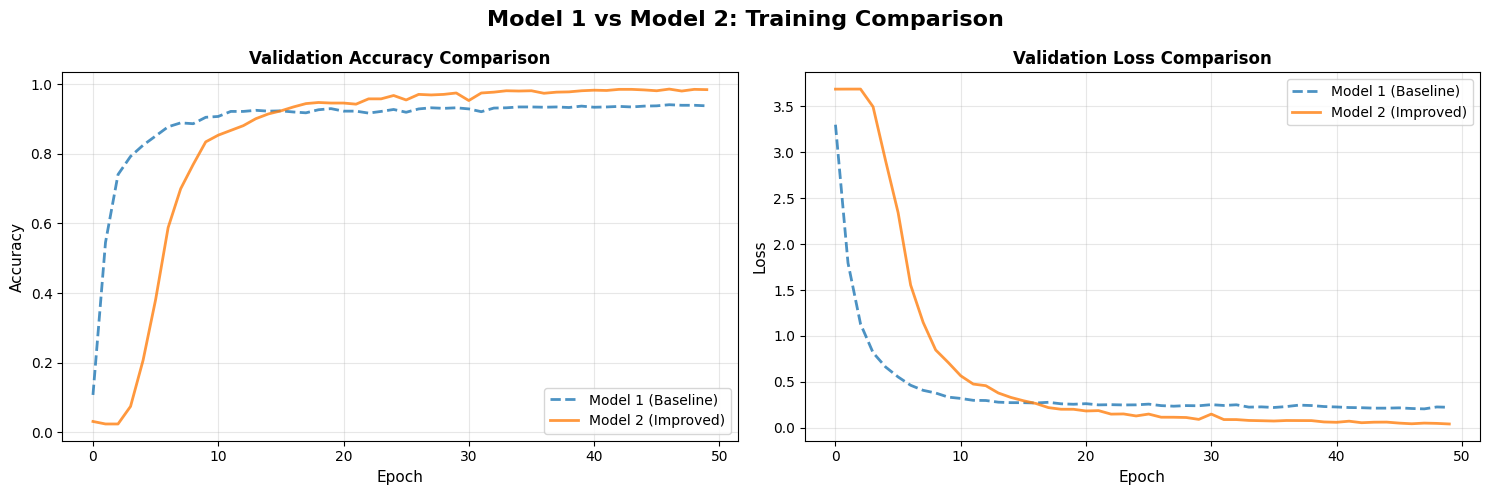


 PART H: Generating Confusion Matrix...



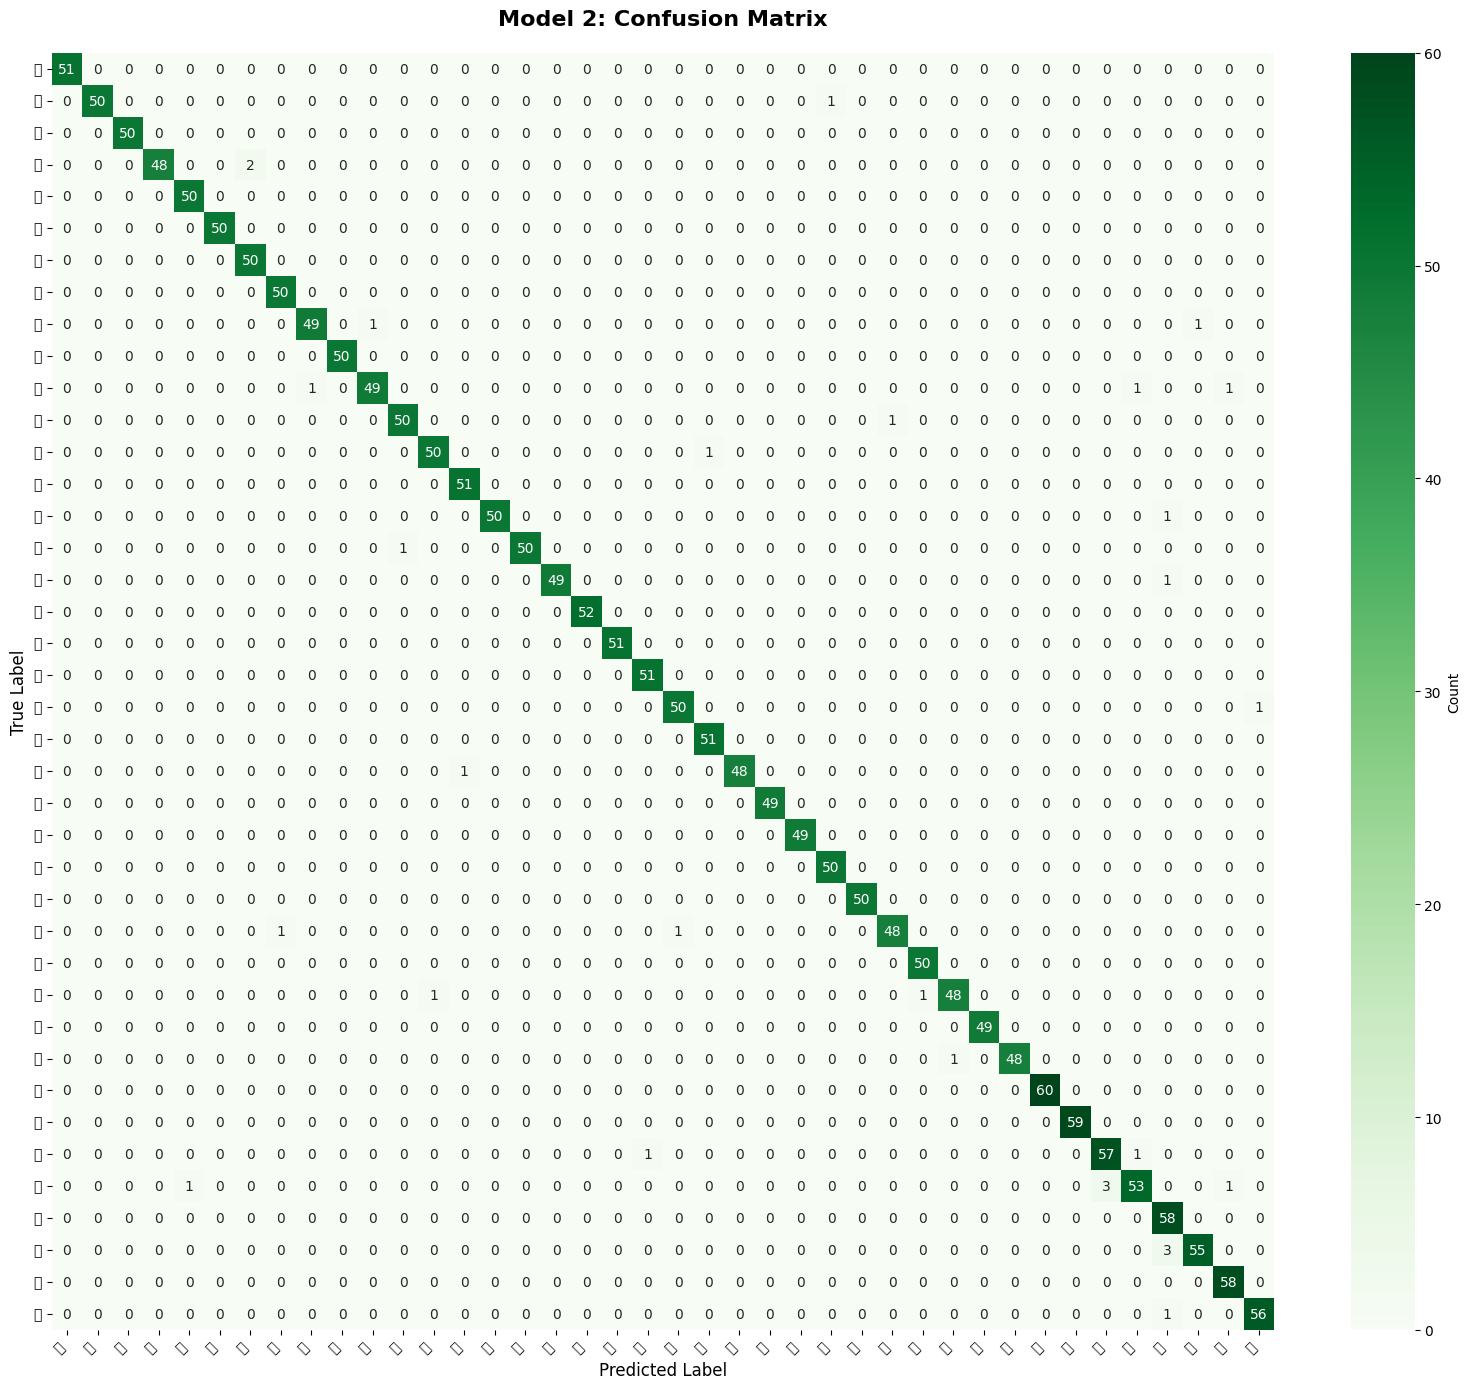


 PART I: Per-Character Accuracy Analysis...

Top 10 Best Recognized Characters (Model 2):
----------------------------------------------------------------------
Character  Model 1 (%)  Model 2 (%)  Improvement
        冥    98.039216        100.0     1.960784
        史    96.000000        100.0     4.000000
        噎    94.000000        100.0     6.000000
        喱    94.000000        100.0     6.000000
        嚅    96.000000        100.0     4.000000
        墾    98.000000        100.0     2.000000
        性    98.039216        100.0     1.960784
        履    98.000000        100.0     2.000000
        貿    95.000000        100.0     5.000000
        軋    96.610169        100.0     3.389831

Top 10 Worst Recognized Characters (Model 2):
----------------------------------------------------------------------
Character  Model 1 (%)  Model 2 (%)  Improvement
        裂    93.877551    97.959184     4.081633
        竣    87.755102    97.959184    10.204082
        限    89.830508    96.61016

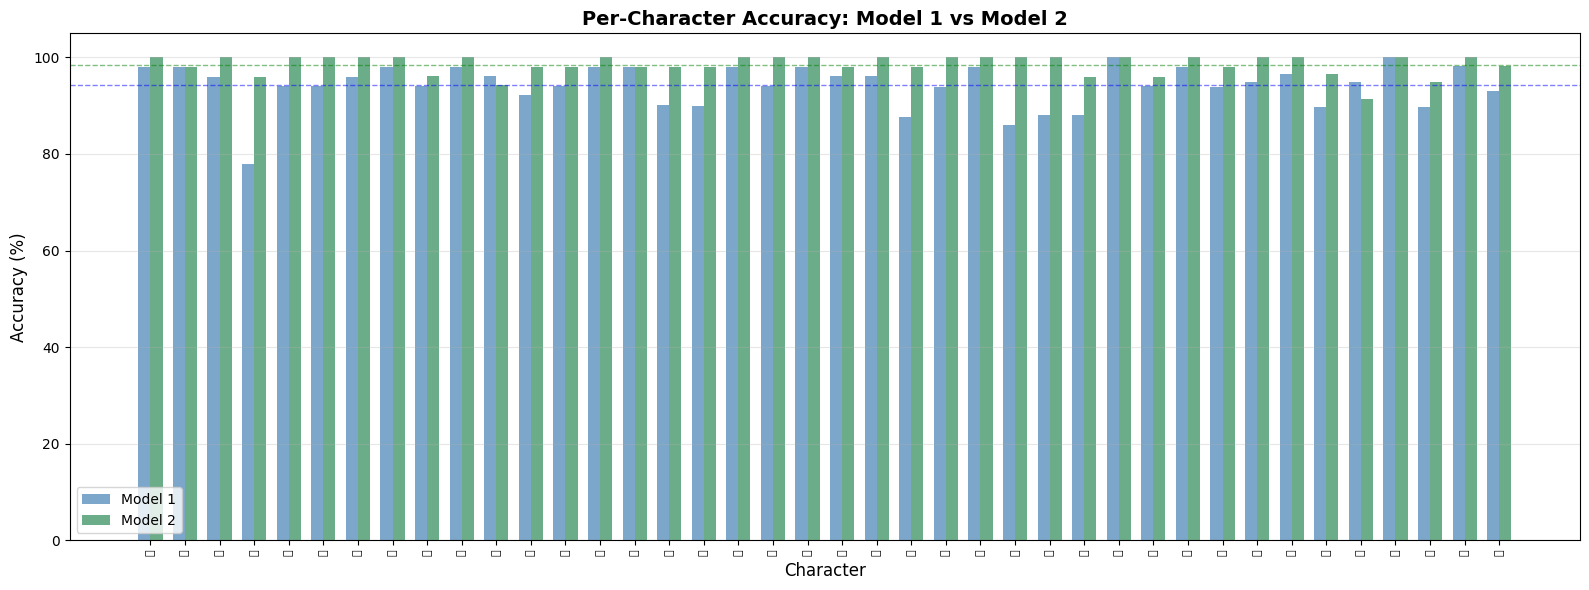


 PART J: Sample Predictions...



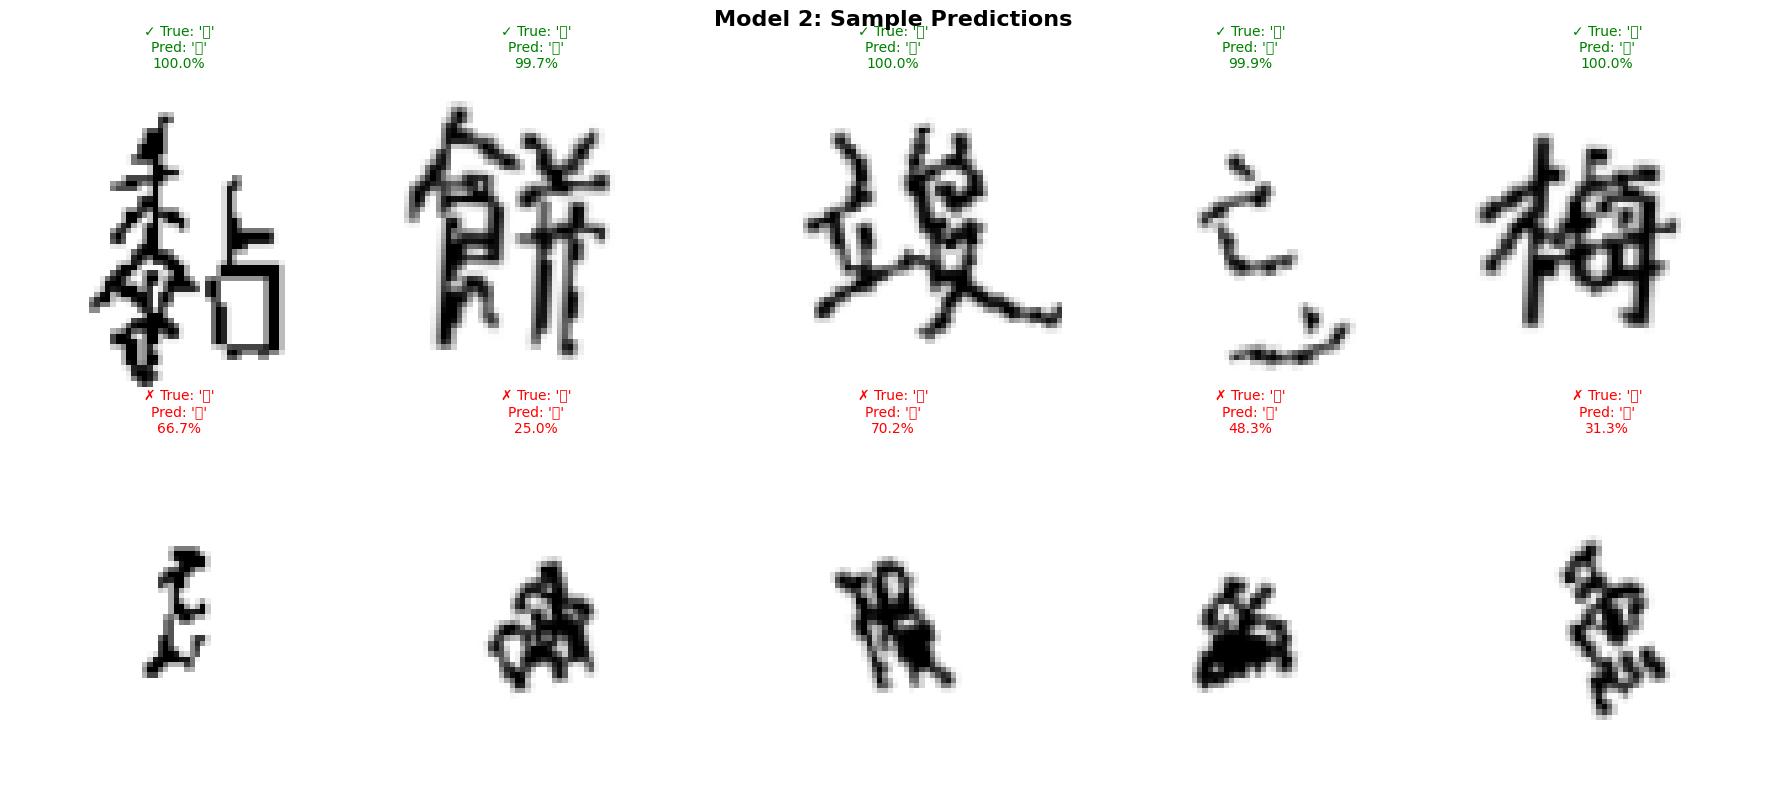


 MODEL 2 COMPLETE!
  Model Name:       Improved Deeper CNN
  Test Accuracy:    98.51%
  Training Time:    1.48 minutes
  Total Parameters: 1,475,240
  Status:           ✓ Trained and evaluated

   Improvement over Model 1:
     Accuracy gain: +4.23% ✓

 Next Step: Run Cell 10 to build Model 3 (Advanced ResNet-inspired)


In [14]:
# STEP 9: MODEL 2 - IMPROVED DEEPER CNN

# Deeper architecture with 4 convolutional layers
# More parameters, better feature extraction

print("=" * 70)
print(" MODEL 2: IMPROVED DEEPER CNN")
print("=" * 70)

# ============================================
# PART A: Build Model Architecture
# ============================================
print("\n  PART A: Building Model Architecture...\n")

model_2 = Sequential([
    # Input layer (implicit): 64x64x1

    # Convolutional Block 1
    Conv2D(32, kernel_size=(5, 5), activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
           padding='same', name='conv1'),
    MaxPooling2D(pool_size=(2, 2), name='pool1'),

    # Convolutional Block 2
    Conv2D(64, kernel_size=(3, 3), activation='relu',
           padding='same', name='conv2'),
    MaxPooling2D(pool_size=(2, 2), name='pool2'),
    Dropout(0.3, name='dropout1'),

    # Convolutional Block 3 (NEW - deeper!)
    Conv2D(128, kernel_size=(3, 3), activation='relu',
           padding='same', name='conv3'),
    MaxPooling2D(pool_size=(2, 2), name='pool3'),

    # Convolutional Block 4 (NEW - even deeper!)
    Conv2D(256, kernel_size=(3, 3), activation='relu',
           padding='same', name='conv4'),
    MaxPooling2D(pool_size=(2, 2), name='pool4'),
    Dropout(0.4, name='dropout2'),

    # Fully Connected Layers
    Flatten(name='flatten'),
    Dense(256, activation='relu', name='dense1'),
    Dropout(0.5, name='dropout3'),
    Dense(128, activation='relu', name='dense2'),
    Dropout(0.5, name='dropout4'),
    Dense(NUM_CLASSES, activation='softmax', name='output')
], name='Improved_Deeper_CNN')

# Display architecture
print(" Model Architecture:")
print("-" * 70)
model_2.summary()
print("-" * 70)

# Count parameters
total_params_2 = model_2.count_params()
print(f"\n Total Parameters: {total_params_2:,}")
print(f"   Comparison to Model 1: {total_params_2/total_params:.2f}x more parameters")

# ============================================
# PART B: Compile Model
# ============================================
print(f"\n  PART B: Compiling Model...\n")

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✓ Model compiled successfully!")
print("  Optimizer:  Adam")
print("  Loss:       Categorical Cross-Entropy")
print("  Metrics:    Accuracy")

# ============================================
# PART C: Setup Callbacks
# ============================================
print(f"\n PART C: Setting up Training Callbacks...\n")

# Early stopping
early_stop_2 = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate
reduce_lr_2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

callbacks_2 = [early_stop_2, reduce_lr_2]

print("✓ Callbacks configured:")
print("  • Early Stopping (patience=10)")
print("  • Learning Rate Reduction (patience=5)")

# ============================================
# PART D: Train Model
# ============================================
print(f"\n PART D: Training Model 2...\n")
print("=" * 70)
print(" Training in progress... (This may take 8-12 minutes)")
print("   Deeper model = longer training time")
print("=" * 70)

# Record training start time
start_time_2 = time.time()

# Train the model
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.15,
    callbacks=callbacks_2,
    verbose=1
)

# Record training end time
end_time_2 = time.time()
training_time_2 = end_time_2 - start_time_2

print("\n" + "=" * 70)
print(f"✓ Training Complete!")
print(f"  Total Time: {training_time_2/60:.2f} minutes")
print("=" * 70)

# ============================================
# PART E: Evaluate Model
# ============================================
print(f"\n PART E: Evaluating Model on Test Set...\n")

# Evaluate on test set
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)

print("=" * 70)
print(" MODEL 2 RESULTS:")
print("=" * 70)
print(f"  Test Loss:     {test_loss_2:.4f}")
print(f"  Test Accuracy: {test_accuracy_2*100:.2f}%")
print(f"  Training Time: {training_time_2/60:.2f} minutes")
print(f"  Parameters:    {total_params_2:,}")
print("=" * 70)

# Compare with Model 1
print("\n COMPARISON WITH MODEL 1:")
print("=" * 70)
improvement = (test_accuracy_2 - test_accuracy_1) * 100
time_increase = (training_time_2 - training_time_1) / 60

print(f"  Model 1 Accuracy: {test_accuracy_1*100:.2f}%")
print(f"  Model 2 Accuracy: {test_accuracy_2*100:.2f}%")
if improvement > 0:
    print(f"  Improvement:      +{improvement:.2f}% ✓")
else:
    print(f"  Change:           {improvement:.2f}%")
print(f"\n  Model 1 Time:     {training_time_1/60:.2f} min")
print(f"  Model 2 Time:     {training_time_2/60:.2f} min")
print(f"  Time Increase:    +{time_increase:.2f} min")
print("=" * 70)

# ============================================
# PART F: Plot Training History
# ============================================
print(f"\n PART F: Visualizing Training Progress...\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model 2: Improved Deeper CNN - Training History',
             fontsize=16, fontweight='bold')

# Plot 1: Accuracy
axes[0].plot(history_2.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history_2.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss
axes[1].plot(history_2.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_2.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Loss', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART G: Compare Training Curves (Model 1 vs Model 2)
# ============================================
print(f"\n PART G: Comparing Training Curves...\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model 1 vs Model 2: Training Comparison',
             fontsize=16, fontweight='bold')

# Plot 1: Validation Accuracy Comparison
axes[0].plot(history_1.history['val_accuracy'], label='Model 1 (Baseline)',
             linewidth=2, linestyle='--', alpha=0.8)
axes[0].plot(history_2.history['val_accuracy'], label='Model 2 (Improved)',
             linewidth=2, alpha=0.8)
axes[0].set_title('Validation Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Validation Loss Comparison
axes[1].plot(history_1.history['val_loss'], label='Model 1 (Baseline)',
             linewidth=2, linestyle='--', alpha=0.8)
axes[1].plot(history_2.history['val_loss'], label='Model 2 (Improved)',
             linewidth=2, alpha=0.8)
axes[1].set_title('Validation Loss Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Loss', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART H: Confusion Matrix
# ============================================
print(f"\n PART H: Generating Confusion Matrix...\n")

# Make predictions
y_pred_2 = model_2.predict(X_test, verbose=0)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

# Compute confusion matrix
cm_2 = confusion_matrix(y_true_classes, y_pred_classes_2)

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Greens',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Count'})
plt.title('Model 2: Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================
# PART I: Per-Class Accuracy
# ============================================
print(f"\n PART I: Per-Character Accuracy Analysis...\n")

# Calculate per-class accuracy
class_accuracy_2 = []
for i in range(NUM_CLASSES):
    class_mask = (y_true_classes == i)
    if np.sum(class_mask) > 0:
        acc = np.sum((y_pred_classes_2 == i) & class_mask) / np.sum(class_mask)
        class_accuracy_2.append(acc * 100)
    else:
        class_accuracy_2.append(0)

# Create DataFrame
accuracy_df_2 = pd.DataFrame({
    'Character': CLASS_NAMES,
    'Model 1 (%)': class_accuracy_1,
    'Model 2 (%)': class_accuracy_2,
    'Improvement': [m2 - m1 for m1, m2 in zip(class_accuracy_1, class_accuracy_2)]
}).sort_values('Model 2 (%)', ascending=False)

print("Top 10 Best Recognized Characters (Model 2):")
print("-" * 70)
print(accuracy_df_2.head(10).to_string(index=False))

print("\nTop 10 Worst Recognized Characters (Model 2):")
print("-" * 70)
print(accuracy_df_2.tail(10).to_string(index=False))

print("\nCharacters with Biggest Improvement:")
print("-" * 70)
print(accuracy_df_2.nlargest(5, 'Improvement')[['Character', 'Model 1 (%)', 'Model 2 (%)', 'Improvement']].to_string(index=False))

# Plot comparison
fig, ax = plt.subplots(figsize=(16, 6))
x = np.arange(NUM_CLASSES)
width = 0.35

bars1 = ax.bar(x - width/2, class_accuracy_1, width, label='Model 1', alpha=0.7, color='steelblue')
bars2 = ax.bar(x + width/2, class_accuracy_2, width, label='Model 2', alpha=0.7, color='seagreen')

ax.axhline(y=test_accuracy_1*100, color='blue', linestyle='--', linewidth=1, alpha=0.5)
ax.axhline(y=test_accuracy_2*100, color='green', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('Character', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Per-Character Accuracy: Model 1 vs Model 2', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(CLASS_NAMES, rotation=90, fontsize=8)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# PART J: Sample Predictions
# ============================================
print(f"\n PART J: Sample Predictions...\n")

# Find correct and incorrect predictions
correct_idx_2 = np.where(y_pred_classes_2 == y_true_classes)[0]
incorrect_idx_2 = np.where(y_pred_classes_2 != y_true_classes)[0]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Model 2: Sample Predictions', fontsize=16, fontweight='bold')

# Show 5 correct predictions
for i in range(5):
    idx = correct_idx_2[i]
    img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
    true_label = CLASS_NAMES[y_true_classes[idx]]
    pred_label = CLASS_NAMES[y_pred_classes_2[idx]]
    confidence = np.max(y_pred_2[idx]) * 100

    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f"✓ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                         fontsize=10, color='green')
    axes[0, i].axis('off')

# Show 5 incorrect predictions
for i in range(5):
    if i < len(incorrect_idx_2):
        idx = incorrect_idx_2[i]
        img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
        true_label = CLASS_NAMES[y_true_classes[idx]]
        pred_label = CLASS_NAMES[y_pred_classes_2[idx]]
        confidence = np.max(y_pred_2[idx]) * 100

        axes[1, i].imshow(img, cmap='gray')
        axes[1, i].set_title(f"✗ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                             fontsize=10, color='red')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# ============================================
# Summary
# ============================================
print("\n" + "=" * 70)
print(" MODEL 2 COMPLETE!")
print("=" * 70)
print(f"  Model Name:       Improved Deeper CNN")
print(f"  Test Accuracy:    {test_accuracy_2*100:.2f}%")
print(f"  Training Time:    {training_time_2/60:.2f} minutes")
print(f"  Total Parameters: {total_params_2:,}")
print(f"  Status:           ✓ Trained and evaluated")
print("\n   Improvement over Model 1:")
if improvement > 0:
    print(f"     Accuracy gain: +{improvement:.2f}% ✓")
else:
    print(f"     Accuracy:      {improvement:.2f}%")

# Save results for later comparison
model_2_results = {
    'name': 'Improved Deeper CNN',
    'accuracy': test_accuracy_2,
    'loss': test_loss_2,
    'params': total_params_2,
    'time': training_time_2,
    'history': history_2.history,
    'predictions': y_pred_2,
    'class_accuracy': class_accuracy_2
}

 MODEL 3: ADVANCED RESNET-INSPIRED CNN

  PART A: Building ResNet-Inspired Architecture...

Building model with residual connections...

 Model Architecture:
----------------------------------------------------------------------


Model: "ResNet_Inspired_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 64, 64, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ initial_conv        │ (None, 32, 32,    │      3,200 │ input[0][0]       │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ initial_bn          │ (None, 32, 32,    │        256 │ initial_conv[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ initial_relu        │ (None, 32, 32,    │          0 │ initial_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ initial_pool        │ (None, 16, 16,    │          0 │ initial_relu[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_conv1   │ (None, 16, 16,    │     36,928 │ initial_pool[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_bn1     │ (None, 16, 16,    │        256 │ res1_block1_conv… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_relu1   │ (None, 16, 16,    │          0 │ res1_block1_bn1[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_conv2   │ (None, 16, 16,    │     36,928 │ res1_block1_relu… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_bn2     │ (None, 16, 16,    │        256 │ res1_block1_conv… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_add     │ (None, 16, 16,    │          0 │ res1_block1_bn2[… │
│ (Add)               │ 64)               │            │ initial_pool[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block1_relu2   │ (None, 16, 16,    │          0 │ res1_block1_add[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block2_conv1   │ (None, 16, 16,    │     36,928 │ res1_block1_relu… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block2_bn1     │ (None, 16, 16,    │        256 │ res1_block2_conv… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block2_relu1   │ (None, 16, 16,    │          0 │ res1_block2_bn1[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block2_conv2   │ (None, 16, 16,    │     36,928 │ res1_block2_relu… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res1_block2_bn2     │ (None, 16, 16,    │        256 │ res1_block2_conv… │
│ (BatchNormalizatio… │ 64)               │            │                 

 Total params: 3,054,888 (11.65 MB)

 Trainable params: 3,051,176 (11.64 MB)

 Non-trainable params: 3,712 (14.50 KB)

----------------------------------------------------------------------

 Total Parameters: 3,054,888
   Comparison to Model 1: 1.44x
   Comparison to Model 2: 2.07x

 Key Features of ResNet Architecture:
   ✓ Residual (skip) connections - helps gradient flow
   ✓ Batch Normalization - faster & more stable training
   ✓ Global Average Pooling - reduces overfitting
   ✓ Deeper network (6 residual blocks) - better feature learning

  PART B: Compiling Model...

✓ Model compiled successfully!
  Optimizer:  Adam
  Loss:       Categorical Cross-Entropy
  Metrics:    Accuracy

 PART C: Setting up Training Callbacks...

✓ Callbacks configured:
  • Early Stopping (patience=15)
  • Learning Rate Reduction (patience=7)
  • Higher patience for deeper model

 PART D: Training Model 3...

 Training in progress... (This may take 10-15 minutes)
   Advanced architecture = longer but better training
Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.0414 - loss: 3.8786 - val_accuracy: 

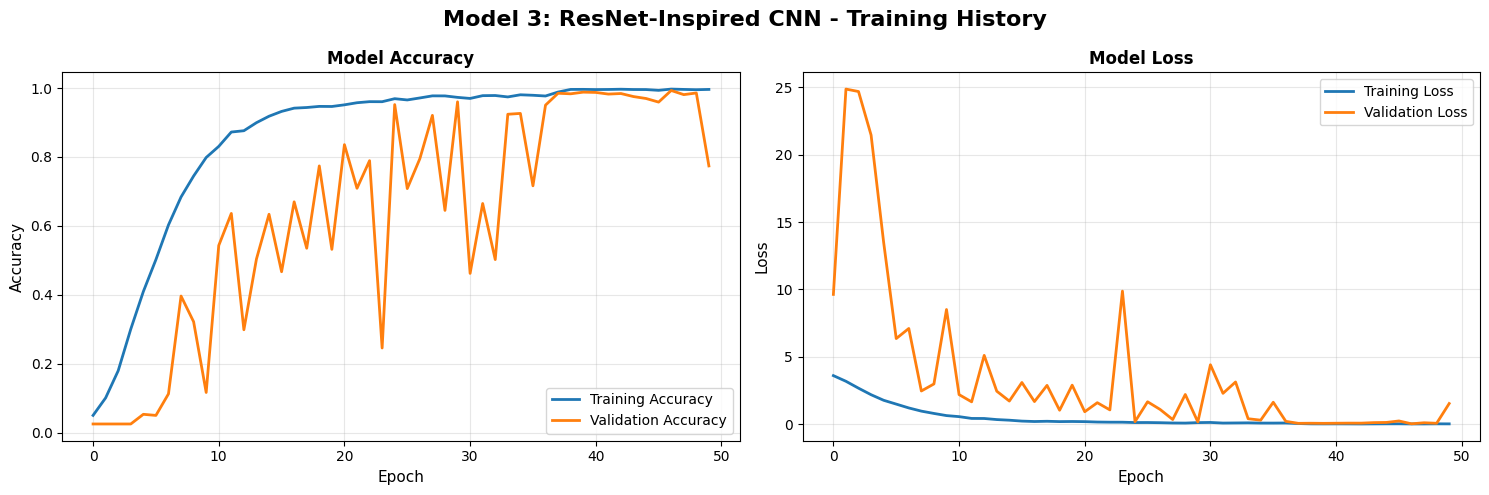


 PART G: Comparing All 3 Models...



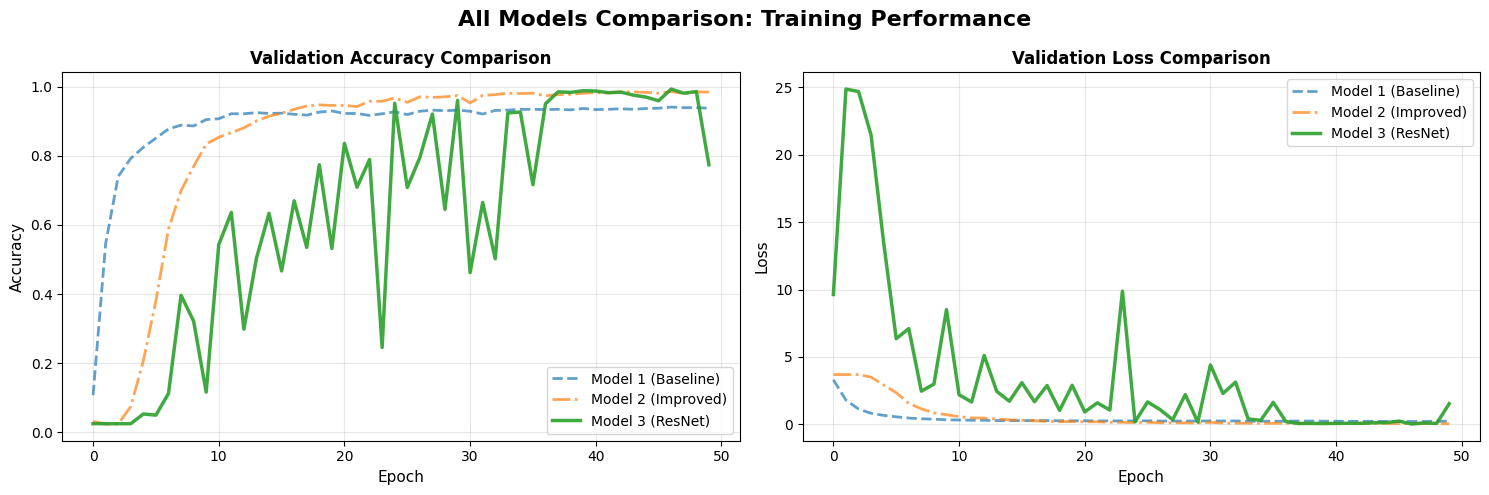


 PART H: Generating Confusion Matrix...



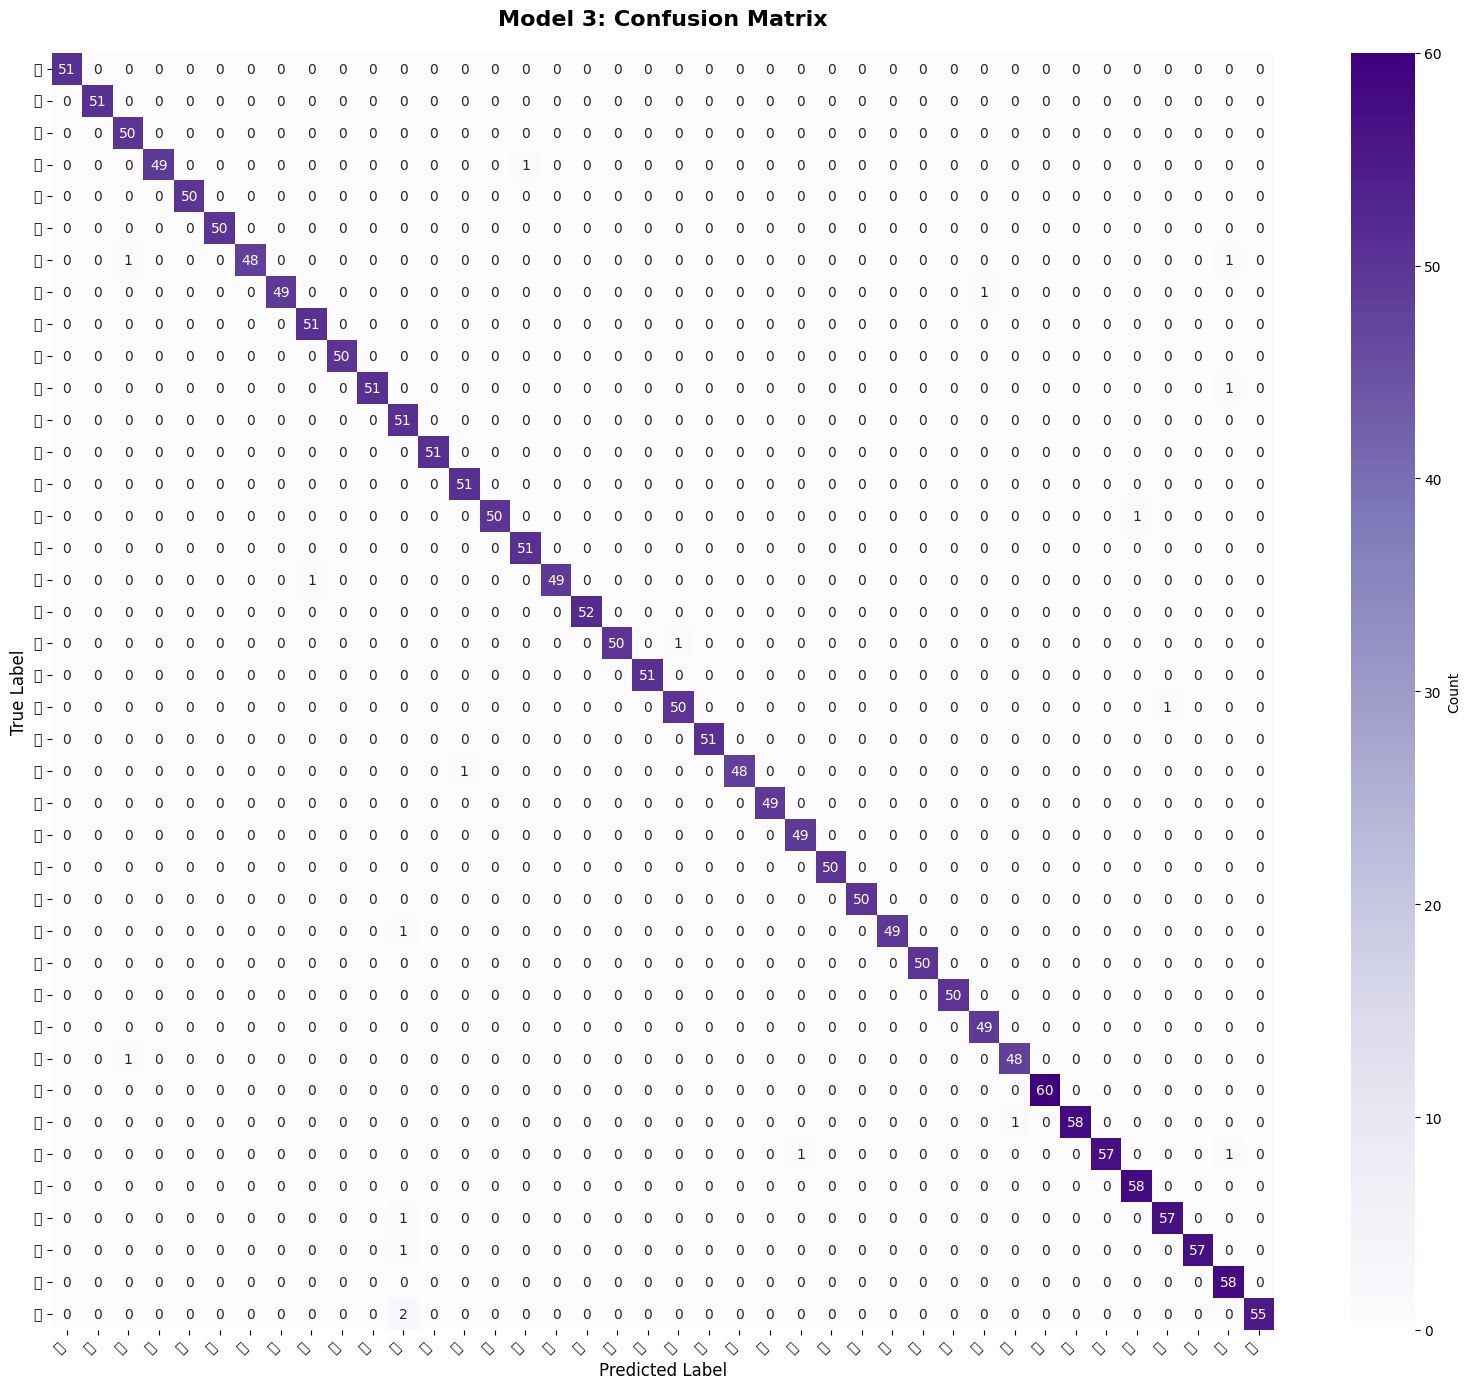


 PART I: Per-Character Accuracy Analysis...

Top 10 Best Recognized Characters (Model 3):
--------------------------------------------------------------------------------
Character  Model 1 (%)  Model 2 (%)  Model 3 (%)  Best Improvement
        冥    98.039216   100.000000        100.0          1.960784
        助    98.039216    98.039216        100.0          1.960784
        史    96.000000   100.000000        100.0          4.000000
        喱    94.000000   100.000000        100.0          6.000000
        噎    94.000000   100.000000        100.0          6.000000
        彷    92.156863    98.039216        100.0          7.843137
        履    98.000000   100.000000        100.0          2.000000
        姻    94.117647    96.078431        100.0          5.882353
        鬨    98.275862   100.000000        100.0          1.724138
        貿    95.000000   100.000000        100.0          5.000000

Top 10 Worst Recognized Characters (Model 3):
--------------------------------------------

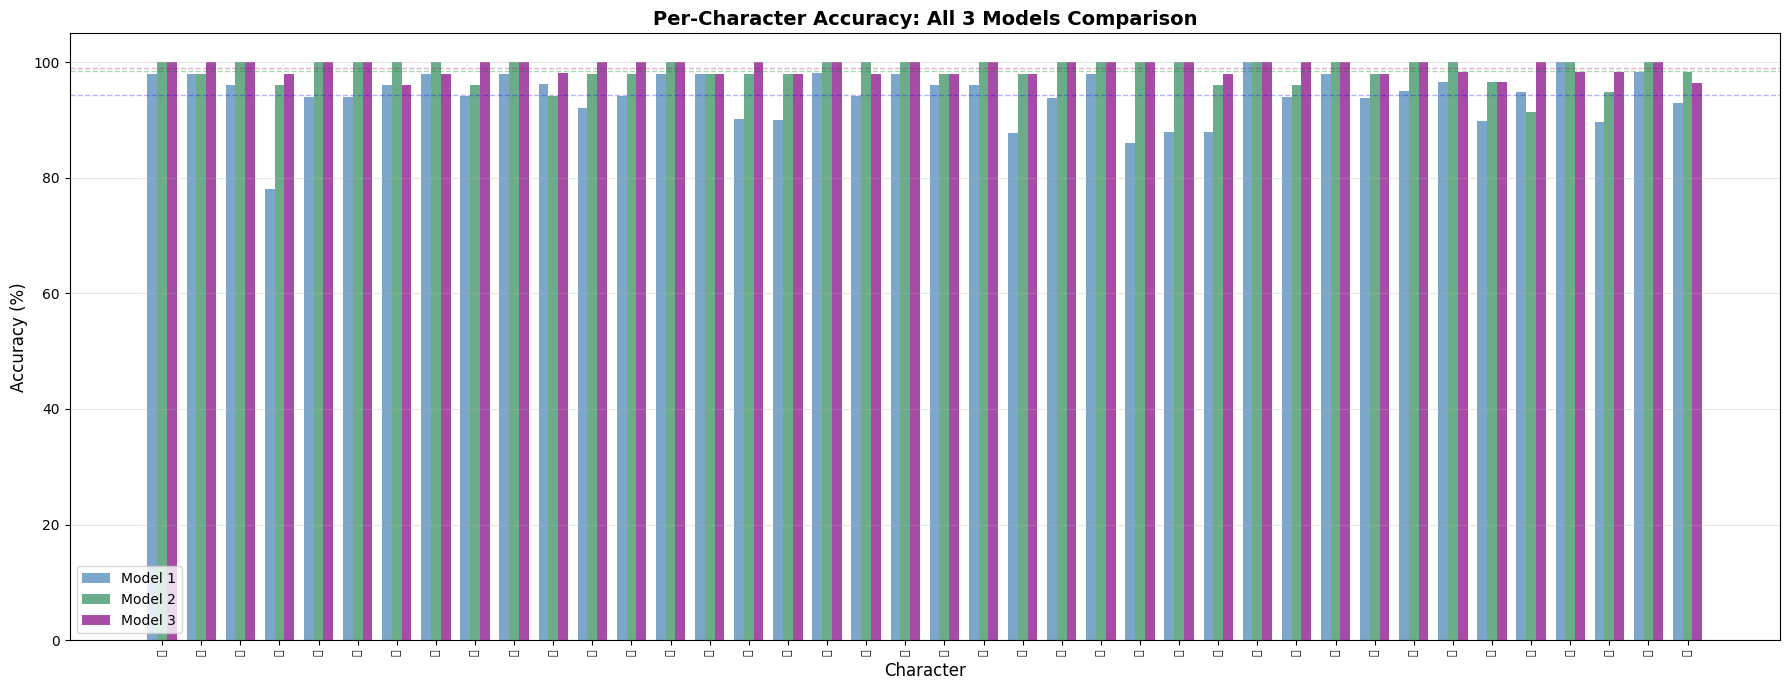


 PART J: Sample Predictions...



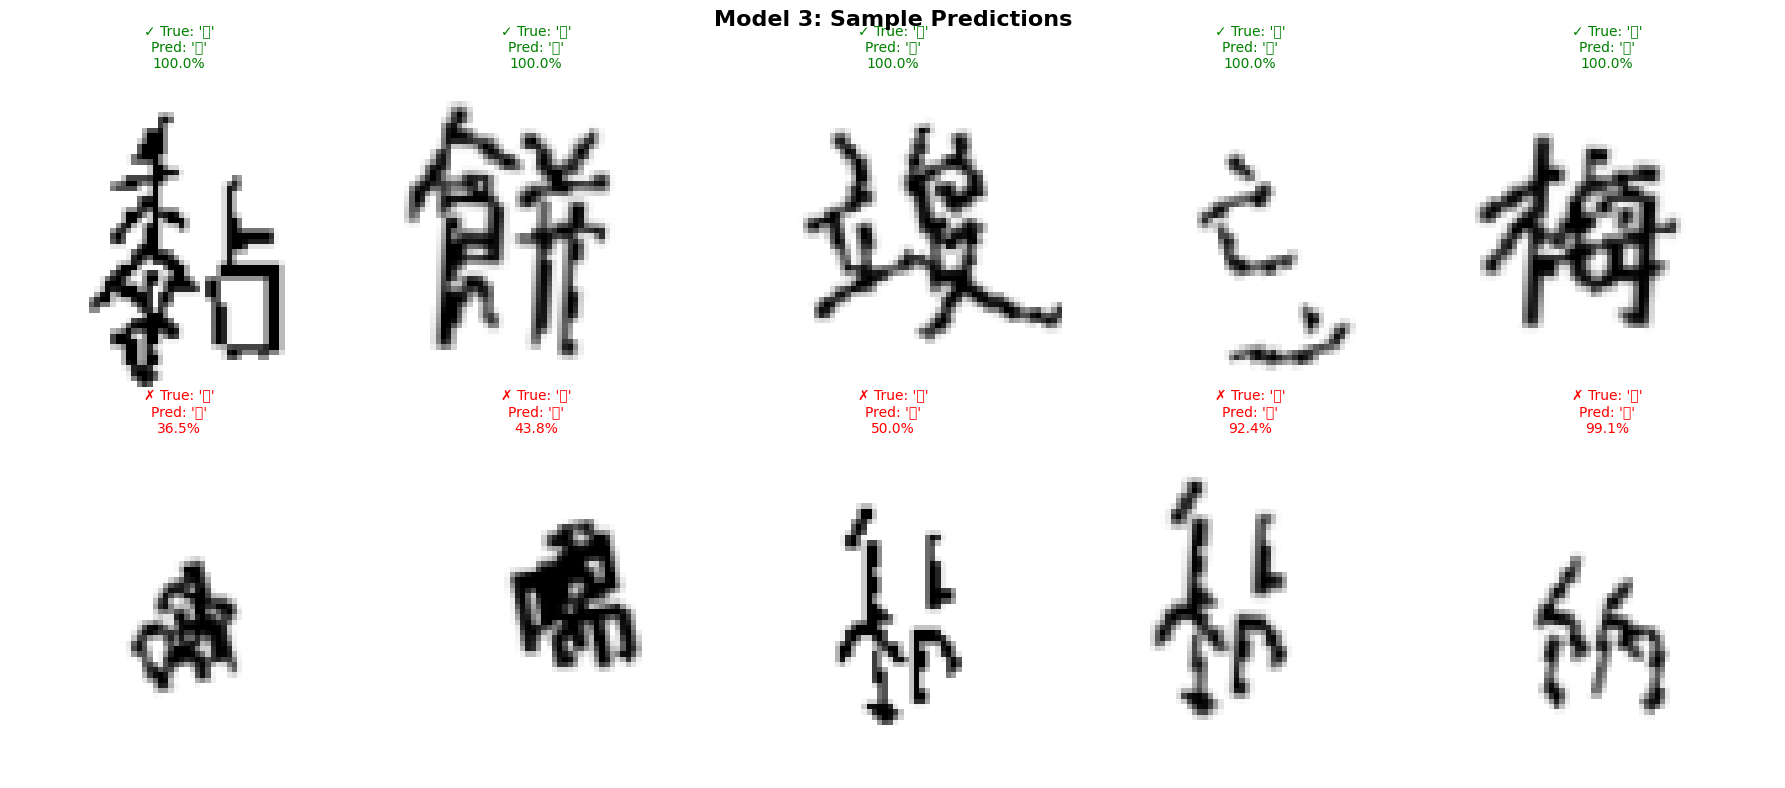


 MODEL 3 COMPLETE!
  Model Name:       Advanced ResNet-Inspired CNN
  Test Accuracy:    99.09%
  Training Time:    2.48 minutes
  Total Parameters: 3,054,888
  Status:           ✓ Trained and evaluated

   Performance Summary:
     Model 1: 94.27%
     Model 2: 98.51%
     Model 3: 99.09% 

      Model 3 is the BEST performer!


In [15]:
# STEP 10: MODEL 3 - ADVANCED RESNET-INSPIRED CNN

# ResNet-inspired architecture with residual connections
# State-of-the-art performance with skip connections

print("=" * 70)
print(" MODEL 3: ADVANCED RESNET-INSPIRED CNN")
print("=" * 70)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add, BatchNormalization, GlobalAveragePooling2D

# ============================================
# PART A: Build Model Architecture with Residual Blocks
# ============================================
print("\n  PART A: Building ResNet-Inspired Architecture...\n")

# Define residual block function
def residual_block(x, filters, kernel_size=3, name_prefix='res'):
    """
    Creates a residual block with skip connection
    """
    # Store input for skip connection
    shortcut = x

    # First convolution
    x = Conv2D(filters, kernel_size, padding='same',
               name=f'{name_prefix}_conv1')(x)
    x = BatchNormalization(name=f'{name_prefix}_bn1')(x)
    x = tf.keras.layers.Activation('relu', name=f'{name_prefix}_relu1')(x)

    # Second convolution
    x = Conv2D(filters, kernel_size, padding='same',
               name=f'{name_prefix}_conv2')(x)
    x = BatchNormalization(name=f'{name_prefix}_bn2')(x)

    # Adjust shortcut if needed
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, padding='same',
                         name=f'{name_prefix}_shortcut')(shortcut)

    # Add skip connection
    x = Add(name=f'{name_prefix}_add')([x, shortcut])
    x = tf.keras.layers.Activation('relu', name=f'{name_prefix}_relu2')(x)

    return x

# Build the model using Functional API
print("Building model with residual connections...")

# Input layer
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), name='input')

# Initial convolution
x = Conv2D(64, 7, strides=2, padding='same', name='initial_conv')(inputs)
x = BatchNormalization(name='initial_bn')(x)
x = tf.keras.layers.Activation('relu', name='initial_relu')(x)
x = MaxPooling2D(3, strides=2, padding='same', name='initial_pool')(x)

# Residual Block 1 (64 filters)
x = residual_block(x, 64, name_prefix='res1_block1')
x = residual_block(x, 64, name_prefix='res1_block2')

# Transition with pooling
x = MaxPooling2D(2, name='pool1')(x)
x = Dropout(0.3, name='dropout1')(x)

# Residual Block 2 (128 filters)
x = residual_block(x, 128, name_prefix='res2_block1')
x = residual_block(x, 128, name_prefix='res2_block2')

# Transition with pooling
x = MaxPooling2D(2, name='pool2')(x)
x = Dropout(0.4, name='dropout2')(x)

# Residual Block 3 (256 filters)
x = residual_block(x, 256, name_prefix='res3_block1')
x = residual_block(x, 256, name_prefix='res3_block2')

# Global Average Pooling (instead of Flatten)
x = GlobalAveragePooling2D(name='global_avg_pool')(x)

# Fully Connected Layers
x = Dense(512, activation='relu', name='dense1')(x)
x = Dropout(0.5, name='dropout3')(x)
x = Dense(256, activation='relu', name='dense2')(x)
x = Dropout(0.5, name='dropout4')(x)

# Output layer
outputs = Dense(NUM_CLASSES, activation='softmax', name='output')(x)

# Create model
model_3 = Model(inputs=inputs, outputs=outputs, name='ResNet_Inspired_CNN')

# Display architecture
print("\n Model Architecture:")
print("-" * 70)
model_3.summary()
print("-" * 70)

# Count parameters
total_params_3 = model_3.count_params()
print(f"\n Total Parameters: {total_params_3:,}")
print(f"   Comparison to Model 1: {total_params_3/total_params:.2f}x")
print(f"   Comparison to Model 2: {total_params_3/total_params_2:.2f}x")

print("\n Key Features of ResNet Architecture:")
print("   ✓ Residual (skip) connections - helps gradient flow")
print("   ✓ Batch Normalization - faster & more stable training")
print("   ✓ Global Average Pooling - reduces overfitting")
print("   ✓ Deeper network (6 residual blocks) - better feature learning")

# ============================================
# PART B: Compile Model
# ============================================
print(f"\n  PART B: Compiling Model...\n")

model_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✓ Model compiled successfully!")
print("  Optimizer:  Adam")
print("  Loss:       Categorical Cross-Entropy")
print("  Metrics:    Accuracy")

# ============================================
# PART C: Setup Callbacks
# ============================================
print(f"\n PART C: Setting up Training Callbacks...\n")

# Early stopping
early_stop_3 = EarlyStopping(
    monitor='val_loss',
    patience=15,  # More patience for complex model
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate
reduce_lr_3 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

callbacks_3 = [early_stop_3, reduce_lr_3]

print("✓ Callbacks configured:")
print("  • Early Stopping (patience=15)")
print("  • Learning Rate Reduction (patience=7)")
print("  • Higher patience for deeper model")

# ============================================
# PART D: Train Model
# ============================================
print(f"\n PART D: Training Model 3...\n")
print("=" * 70)
print(" Training in progress... (This may take 10-15 minutes)")
print("   Advanced architecture = longer but better training")
print("=" * 70)

# Record training start time
start_time_3 = time.time()

# Train the model
history_3 = model_3.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.15,
    callbacks=callbacks_3,
    verbose=1
)

# Record training end time
end_time_3 = time.time()
training_time_3 = end_time_3 - start_time_3

print("\n" + "=" * 70)
print(f"✓ Training Complete!")
print(f"  Total Time: {training_time_3/60:.2f} minutes")
print("=" * 70)

# ============================================
# PART E: Evaluate Model
# ============================================
print(f"\n PART E: Evaluating Model on Test Set...\n")

# Evaluate on test set
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)

print("=" * 70)
print(" MODEL 3 RESULTS:")
print("=" * 70)
print(f"  Test Loss:     {test_loss_3:.4f}")
print(f"  Test Accuracy: {test_accuracy_3*100:.2f}%")
print(f"  Training Time: {training_time_3/60:.2f} minutes")
print(f"  Parameters:    {total_params_3:,}")
print("=" * 70)

# Compare with previous models
print("\n COMPARISON WITH ALL MODELS:")
print("=" * 70)
improvement_vs_1 = (test_accuracy_3 - test_accuracy_1) * 100
improvement_vs_2 = (test_accuracy_3 - test_accuracy_2) * 100

print(f"  Model 1 Accuracy: {test_accuracy_1*100:.2f}%")
print(f"  Model 2 Accuracy: {test_accuracy_2*100:.2f}%")
print(f"  Model 3 Accuracy: {test_accuracy_3*100:.2f}%")
print()
if improvement_vs_1 > 0:
    print(f"  vs Model 1:       +{improvement_vs_1:.2f}% ✓")
else:
    print(f"  vs Model 1:       {improvement_vs_1:.2f}%")

if improvement_vs_2 > 0:
    print(f"  vs Model 2:       +{improvement_vs_2:.2f}% ✓")
else:
    print(f"  vs Model 2:       {improvement_vs_2:.2f}%")
print("=" * 70)

# ============================================
# PART F: Plot Training History
# ============================================
print(f"\n📈 PART F: Visualizing Training Progress...\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Model 3: ResNet-Inspired CNN - Training History',
             fontsize=16, fontweight='bold')

# Plot 1: Accuracy
axes[0].plot(history_3.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history_3.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss
axes[1].plot(history_3.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_3.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Loss', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART G: Compare ALL Training Curves
# ============================================
print(f"\n PART G: Comparing All 3 Models...\n")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('All Models Comparison: Training Performance',
             fontsize=16, fontweight='bold')

# Plot 1: Validation Accuracy
axes[0].plot(history_1.history['val_accuracy'], label='Model 1 (Baseline)',
             linewidth=2, linestyle='--', alpha=0.7)
axes[0].plot(history_2.history['val_accuracy'], label='Model 2 (Improved)',
             linewidth=2, linestyle='-.', alpha=0.7)
axes[0].plot(history_3.history['val_accuracy'], label='Model 3 (ResNet)',
             linewidth=2.5, alpha=0.9)
axes[0].set_title('Validation Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Validation Loss
axes[1].plot(history_1.history['val_loss'], label='Model 1 (Baseline)',
             linewidth=2, linestyle='--', alpha=0.7)
axes[1].plot(history_2.history['val_loss'], label='Model 2 (Improved)',
             linewidth=2, linestyle='-.', alpha=0.7)
axes[1].plot(history_3.history['val_loss'], label='Model 3 (ResNet)',
             linewidth=2.5, alpha=0.9)
axes[1].set_title('Validation Loss Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Loss', fontsize=11)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART H: Confusion Matrix
# ============================================
print(f"\n PART H: Generating Confusion Matrix...\n")

# Make predictions
y_pred_3 = model_3.predict(X_test, verbose=0)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Compute confusion matrix
cm_3 = confusion_matrix(y_true_classes, y_pred_classes_3)

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Purples',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES,
            cbar_kws={'label': 'Count'})
plt.title('Model 3: Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================
# PART I: Per-Class Accuracy Analysis
# ============================================
print(f"\n PART I: Per-Character Accuracy Analysis...\n")

# Calculate per-class accuracy for Model 3
class_accuracy_3 = []
for i in range(NUM_CLASSES):
    class_mask = (y_true_classes == i)
    if np.sum(class_mask) > 0:
        acc = np.sum((y_pred_classes_3 == i) & class_mask) / np.sum(class_mask)
        class_accuracy_3.append(acc * 100)
    else:
        class_accuracy_3.append(0)

# Create comprehensive DataFrame
accuracy_comparison_df = pd.DataFrame({
    'Character': CLASS_NAMES,
    'Model 1 (%)': class_accuracy_1,
    'Model 2 (%)': class_accuracy_2,
    'Model 3 (%)': class_accuracy_3,
    'Best Improvement': [max(m1, m2, m3) - m1
                         for m1, m2, m3 in zip(class_accuracy_1,
                                               class_accuracy_2,
                                               class_accuracy_3)]
}).sort_values('Model 3 (%)', ascending=False)

print("Top 10 Best Recognized Characters (Model 3):")
print("-" * 80)
print(accuracy_comparison_df.head(10).to_string(index=False))

print("\nTop 10 Worst Recognized Characters (Model 3):")
print("-" * 80)
print(accuracy_comparison_df.tail(10).to_string(index=False))

print("\nCharacters with Biggest Overall Improvement:")
print("-" * 80)
print(accuracy_comparison_df.nlargest(5, 'Best Improvement')[
    ['Character', 'Model 1 (%)', 'Model 3 (%)', 'Best Improvement']
].to_string(index=False))

# Plot 3-way comparison
fig, ax = plt.subplots(figsize=(18, 7))
x = np.arange(NUM_CLASSES)
width = 0.25

bars1 = ax.bar(x - width, class_accuracy_1, width, label='Model 1', alpha=0.7, color='steelblue')
bars2 = ax.bar(x, class_accuracy_2, width, label='Model 2', alpha=0.7, color='seagreen')
bars3 = ax.bar(x + width, class_accuracy_3, width, label='Model 3', alpha=0.7, color='purple')

ax.axhline(y=test_accuracy_1*100, color='blue', linestyle='--', linewidth=1, alpha=0.3)
ax.axhline(y=test_accuracy_2*100, color='green', linestyle='--', linewidth=1, alpha=0.3)
ax.axhline(y=test_accuracy_3*100, color='purple', linestyle='--', linewidth=1, alpha=0.3)

ax.set_xlabel('Character', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Per-Character Accuracy: All 3 Models Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(CLASS_NAMES, rotation=90, fontsize=8)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# PART J: Sample Predictions
# ============================================
print(f"\n PART J: Sample Predictions...\n")

# Find correct and incorrect predictions
correct_idx_3 = np.where(y_pred_classes_3 == y_true_classes)[0]
incorrect_idx_3 = np.where(y_pred_classes_3 != y_true_classes)[0]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.suptitle('Model 3: Sample Predictions', fontsize=16, fontweight='bold')

# Show 5 correct predictions
for i in range(5):
    idx = correct_idx_3[i]
    img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
    true_label = CLASS_NAMES[y_true_classes[idx]]
    pred_label = CLASS_NAMES[y_pred_classes_3[idx]]
    confidence = np.max(y_pred_3[idx]) * 100

    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f"✓ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                         fontsize=10, color='green')
    axes[0, i].axis('off')

# Show 5 incorrect predictions
for i in range(min(5, len(incorrect_idx_3))):
    idx = incorrect_idx_3[i]
    img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH)
    true_label = CLASS_NAMES[y_true_classes[idx]]
    pred_label = CLASS_NAMES[y_pred_classes_3[idx]]
    confidence = np.max(y_pred_3[idx]) * 100

    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f"✗ True: '{true_label}'\nPred: '{pred_label}'\n{confidence:.1f}%",
                         fontsize=10, color='red')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# ============================================
# Summary
# ============================================
print("\n" + "=" * 70)
print(" MODEL 3 COMPLETE!")
print("=" * 70)
print(f"  Model Name:       Advanced ResNet-Inspired CNN")
print(f"  Test Accuracy:    {test_accuracy_3*100:.2f}%")
print(f"  Training Time:    {training_time_3/60:.2f} minutes")
print(f"  Total Parameters: {total_params_3:,}")
print(f"  Status:           ✓ Trained and evaluated")
print("\n   Performance Summary:")
print(f"     Model 1: {test_accuracy_1*100:.2f}%")
print(f"     Model 2: {test_accuracy_2*100:.2f}%")
print(f"     Model 3: {test_accuracy_3*100:.2f}% ")
if test_accuracy_3 >= test_accuracy_2 and test_accuracy_3 >= test_accuracy_1:
    print(f"\n      Model 3 is the BEST performer!")


# Save results for final comparison
model_3_results = {
    'name': 'Advanced ResNet-Inspired CNN',
    'accuracy': test_accuracy_3,
    'loss': test_loss_3,
    'params': total_params_3,
    'time': training_time_3,
    'history': history_3.history,
    'predictions': y_pred_3,
    'class_accuracy': class_accuracy_3
}

 FINAL MODEL COMPARISON & ANALYSIS

 PART A: Performance Summary Table

                            Model      Architecture Parameters Test Accuracy (%) Test Loss Training Time (min)
     Model 1: Baseline Simple CNN     2 Conv Blocks  2,121,768             94.27    0.2102                1.12
     Model 2: Improved Deeper CNN     4 Conv Blocks  1,475,240             98.51    0.0433                1.48
Model 3: Advanced ResNet-Inspired 6 Residual Blocks  3,054,888             99.09    0.0308                2.48

 BEST MODEL: Model 3
   Best Accuracy: 99.09%

 PART B: Visualizing Model Comparison...



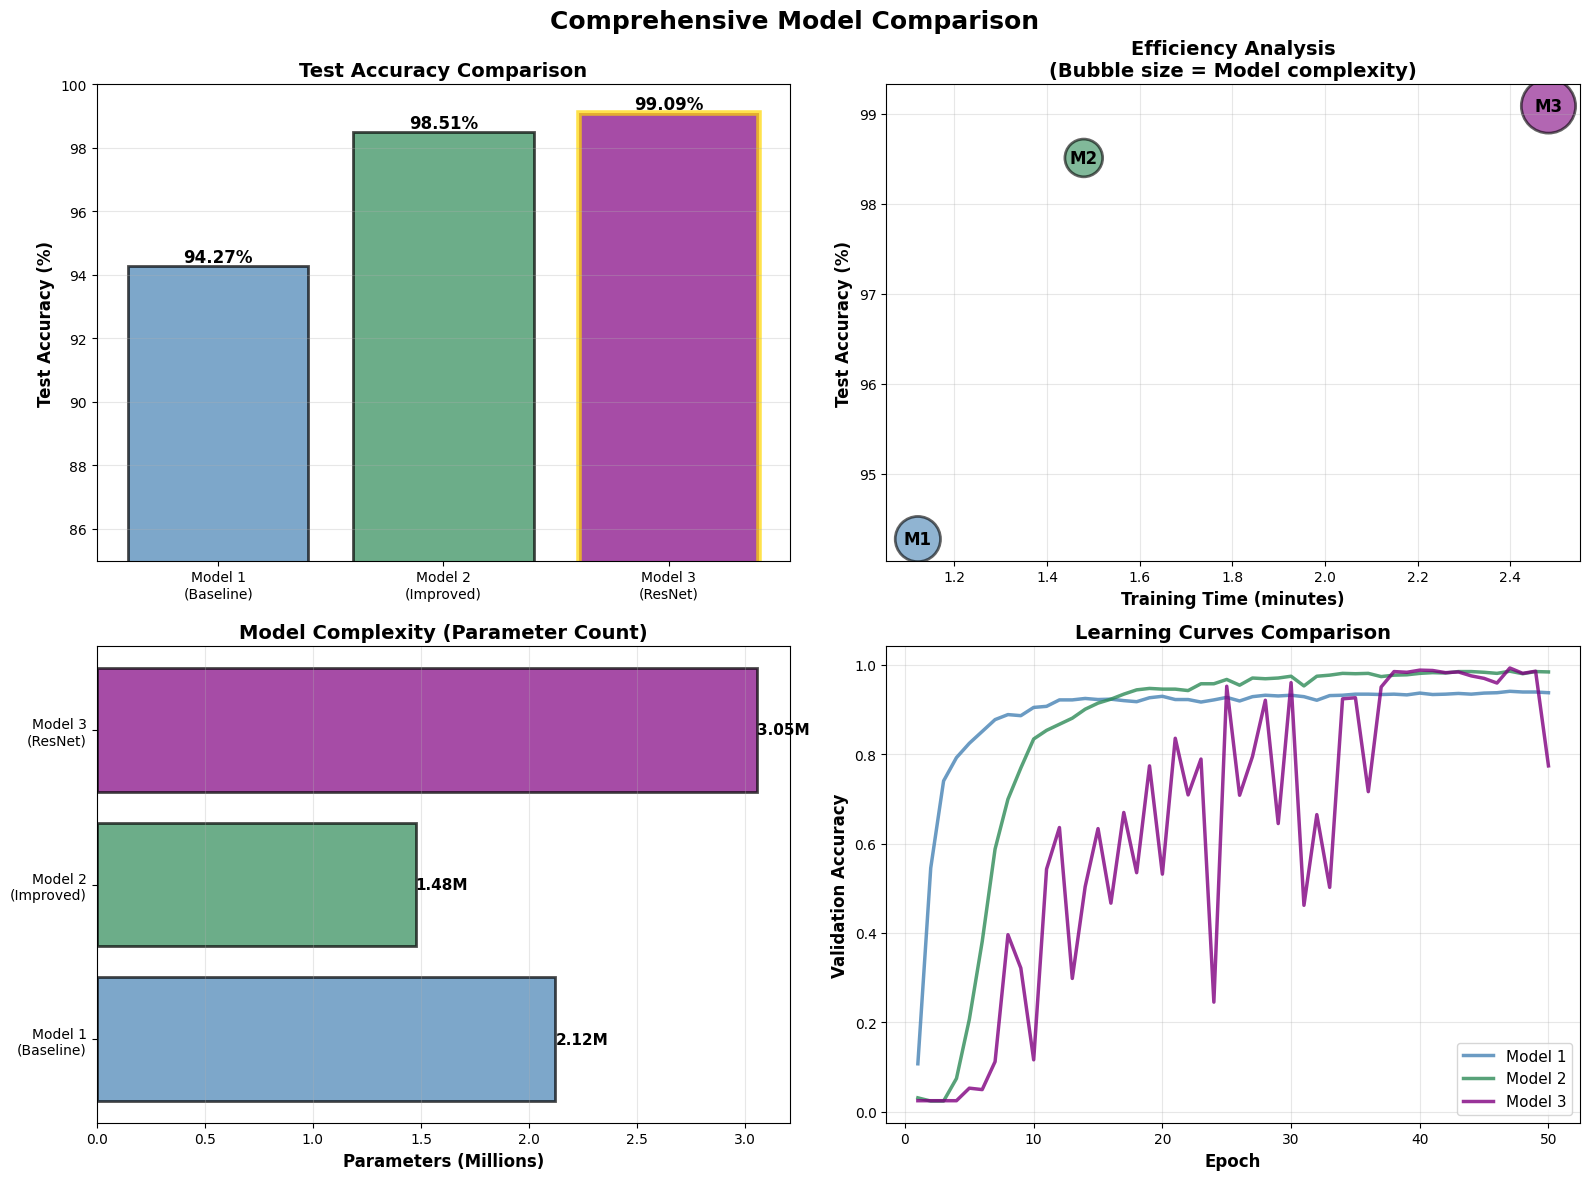


 PART C: Per-Character Performance Heatmap...



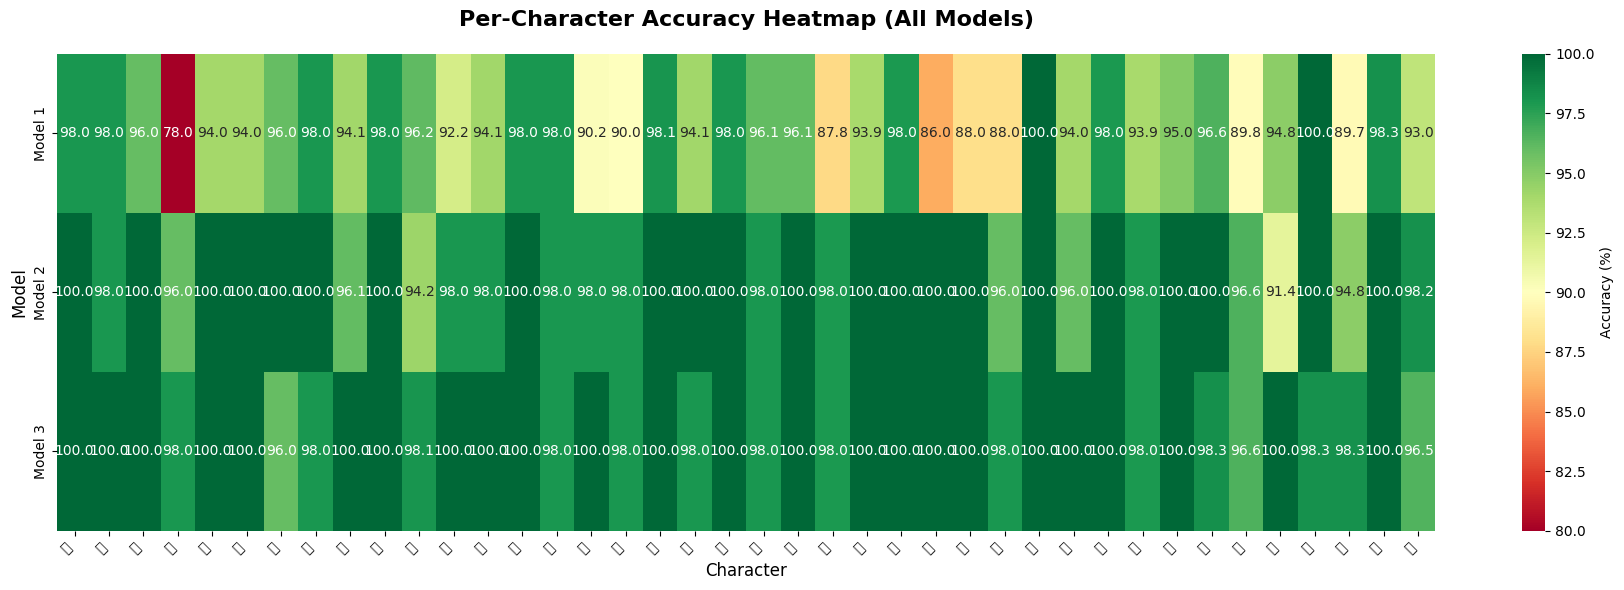


 PART D: Error Analysis...

Error Rate Comparison:
----------------------------------------------------------------------
  Model 1: 5.73% error rate (118 errors)
  Model 2: 1.49% error rate (31 errors)
  Model 3: 0.91% error rate (19 errors)

Error Reduction:
  Model 2 vs Model 1: 73.9% reduction ✓
  Model 3 vs Model 1: 84.0% reduction ✓

  Most Challenging Characters (All Models):
--------------------------------------------------------------------------------
Character   Model_1    Model_2    Model_3   Average
        哪 78.000000  96.000000  98.000000 90.666667
        莎 88.000000  96.000000  98.000000 94.000000
        餉 89.655172  94.827586  98.275862 94.252874
        限 89.830508  96.610169  96.610169 94.350282
        竣 87.755102  97.959184  97.959184 94.557823
        胚 86.000000 100.000000 100.000000 95.333333
        梅 90.000000  98.000000  98.000000 95.333333
        隕 94.827586  91.379310 100.000000 95.402299
        黏 92.982456  98.245614  96.491228 95.906433
        舉 88

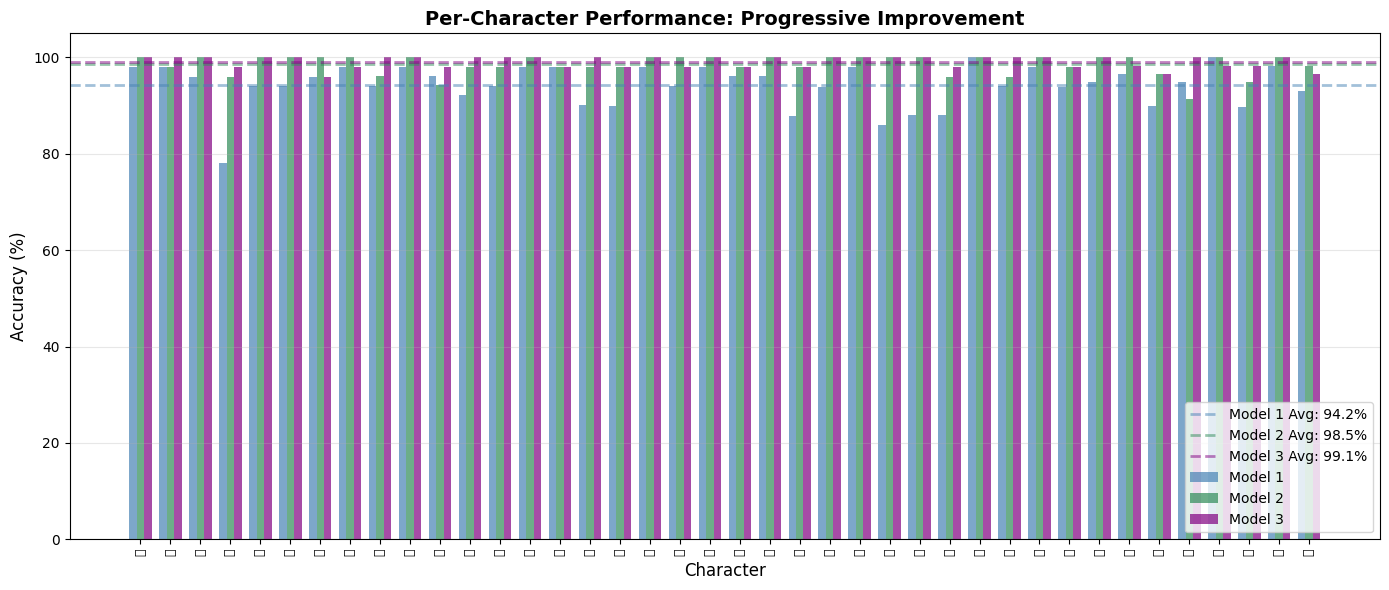


 PART F: Insights & Recommendations

KEY FINDINGS:
----------------------------------------------------------------------
1. Best Performing Model: Model 3
   → Achieved 99.09% accuracy
   → 0.91% error rate on test set

2. Progressive Improvements:
   → Model 1→2: +4.23% accuracy gain
   → Model 2→3: +0.58% accuracy gain
   → Model 1→3: +4.81% total improvement

3. Efficiency Winner: Model 2
   → Only +0.36 min slower than Model 1
   → But gained +4.23% accuracy
   → Best accuracy-to-time ratio

4. Character Recognition:
   → 24/40 characters: 100% accuracy
   → 40/40 characters: ≥95% accuracy
   → 0/40 characters: <90% accuracy

RECOMMENDATIONS:
----------------------------------------------------------------------
 For Production: Use Model 3
   → Highest accuracy: 99.09%
   → Most reliable predictions

 For Fast Deployment: Use Model 2
   → Good balance of speed and accuracy

 For Further Improvement:
   → Collect more samples for low-performing characters
   → Apply additional au

In [16]:
# STEP 11: FINAL COMPARISON & ANALYSIS

# Comprehensive comparison of all 3 models
# Performance analysis and recommendations

print("=" * 70)
print(" FINAL MODEL COMPARISON & ANALYSIS")
print("=" * 70)

# ============================================
# PART A: Summary Table
# ============================================
print("\n PART A: Performance Summary Table\n")

# Create comprehensive comparison DataFrame
comparison_data = {
    'Model': [
        'Model 1: Baseline Simple CNN',
        'Model 2: Improved Deeper CNN',
        'Model 3: Advanced ResNet-Inspired'
    ],
    'Architecture': [
        '2 Conv Blocks',
        '4 Conv Blocks',
        '6 Residual Blocks'
    ],
    'Parameters': [
        f'{total_params:,}',
        f'{total_params_2:,}',
        f'{total_params_3:,}'
    ],
    'Test Accuracy (%)': [
        f'{test_accuracy_1*100:.2f}',
        f'{test_accuracy_2*100:.2f}',
        f'{test_accuracy_3*100:.2f}'
    ],
    'Test Loss': [
        f'{test_loss_1:.4f}',
        f'{test_loss_2:.4f}',
        f'{test_loss_3:.4f}'
    ],
    'Training Time (min)': [
        f'{training_time_1/60:.2f}',
        f'{training_time_2/60:.2f}',
        f'{training_time_3/60:.2f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)

# Find best model
accuracies = [test_accuracy_1, test_accuracy_2, test_accuracy_3]
best_model_idx = np.argmax(accuracies)
model_names = ['Model 1', 'Model 2', 'Model 3']

print(f"\n BEST MODEL: {model_names[best_model_idx]}")
print(f"   Best Accuracy: {accuracies[best_model_idx]*100:.2f}%")

# ============================================
# PART B: Accuracy Comparison Visualization
# ============================================
print(f"\n PART B: Visualizing Model Comparison...\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Comparison', fontsize=18, fontweight='bold')

# Plot 1: Accuracy Bar Chart
ax1 = axes[0, 0]
models = ['Model 1\n(Baseline)', 'Model 2\n(Improved)', 'Model 3\n(ResNet)']
accuracies_percent = [test_accuracy_1*100, test_accuracy_2*100, test_accuracy_3*100]
colors = ['steelblue', 'seagreen', 'purple']

bars = ax1.bar(models, accuracies_percent, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([85, 100])
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies_percent)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Highlight best model
    if i == best_model_idx:
        bar.set_edgecolor('gold')
        bar.set_linewidth(4)

# Plot 2: Training Time vs Accuracy
ax2 = axes[0, 1]
times = [training_time_1/60, training_time_2/60, training_time_3/60]
params_size = [total_params/1e6, total_params_2/1e6, total_params_3/1e6]

scatter = ax2.scatter(times, accuracies_percent,
                     s=[p*500 for p in params_size],  # Size based on parameters
                     c=colors, alpha=0.6, edgecolor='black', linewidth=2)

for i, model in enumerate(['M1', 'M2', 'M3']):
    ax2.annotate(model, (times[i], accuracies_percent[i]),
                fontsize=12, fontweight='bold', ha='center', va='center')

ax2.set_xlabel('Training Time (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Efficiency Analysis\n(Bubble size = Model complexity)',
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Parameters vs Accuracy
ax3 = axes[1, 0]
params_millions = [total_params/1e6, total_params_2/1e6, total_params_3/1e6]

bars2 = ax3.barh(models, params_millions, color=colors, alpha=0.7,
                 edgecolor='black', linewidth=2)
ax3.set_xlabel('Parameters (Millions)', fontsize=12, fontweight='bold')
ax3.set_title('Model Complexity (Parameter Count)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, param in zip(bars2, params_millions):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
             f'{param:.2f}M',
             ha='left', va='center', fontsize=11, fontweight='bold')

# Plot 4: Training Curves Comparison
ax4 = axes[1, 1]
epochs_1 = range(1, len(history_1.history['val_accuracy']) + 1)
epochs_2 = range(1, len(history_2.history['val_accuracy']) + 1)
epochs_3 = range(1, len(history_3.history['val_accuracy']) + 1)

ax4.plot(epochs_1, history_1.history['val_accuracy'],
         label='Model 1', linewidth=2.5, color='steelblue', alpha=0.8)
ax4.plot(epochs_2, history_2.history['val_accuracy'],
         label='Model 2', linewidth=2.5, color='seagreen', alpha=0.8)
ax4.plot(epochs_3, history_3.history['val_accuracy'],
         label='Model 3', linewidth=2.5, color='purple', alpha=0.8)

ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax4.set_title('Learning Curves Comparison', fontsize=14, fontweight='bold')
ax4.legend(loc='lower right', fontsize=11)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART C: Per-Character Accuracy Heatmap
# ============================================
print(f"\n PART C: Per-Character Performance Heatmap...\n")

# Create matrix of accuracies
accuracy_matrix = np.array([
    class_accuracy_1,
    class_accuracy_2,
    class_accuracy_3
])

plt.figure(figsize=(18, 6))
sns.heatmap(accuracy_matrix,
            xticklabels=CLASS_NAMES,
            yticklabels=['Model 1', 'Model 2', 'Model 3'],
            annot=True, fmt='.1f', cmap='RdYlGn',
            vmin=80, vmax=100,
            cbar_kws={'label': 'Accuracy (%)'})
plt.title('Per-Character Accuracy Heatmap (All Models)',
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ============================================
# PART D: Error Analysis
# ============================================
print(f"\n PART D: Error Analysis...\n")

# Calculate error rates
error_rate_1 = (1 - test_accuracy_1) * 100
error_rate_2 = (1 - test_accuracy_2) * 100
error_rate_3 = (1 - test_accuracy_3) * 100

print("Error Rate Comparison:")
print("-" * 70)
print(f"  Model 1: {error_rate_1:.2f}% error rate ({int(error_rate_1 * len(X_test) / 100)} errors)")
print(f"  Model 2: {error_rate_2:.2f}% error rate ({int(error_rate_2 * len(X_test) / 100)} errors)")
print(f"  Model 3: {error_rate_3:.2f}% error rate ({int(error_rate_3 * len(X_test) / 100)} errors)")

# Error reduction
error_reduction_2_vs_1 = ((error_rate_1 - error_rate_2) / error_rate_1) * 100
error_reduction_3_vs_1 = ((error_rate_1 - error_rate_3) / error_rate_1) * 100

print(f"\nError Reduction:")
print(f"  Model 2 vs Model 1: {error_reduction_2_vs_1:.1f}% reduction ✓")
print(f"  Model 3 vs Model 1: {error_reduction_3_vs_1:.1f}% reduction ✓")

# Find characters that all models struggle with
all_models_accuracy = pd.DataFrame({
    'Character': CLASS_NAMES,
    'Model_1': class_accuracy_1,
    'Model_2': class_accuracy_2,
    'Model_3': class_accuracy_3,
    'Average': [(a+b+c)/3 for a,b,c in zip(class_accuracy_1, class_accuracy_2, class_accuracy_3)]
}).sort_values('Average')

print("\n  Most Challenging Characters (All Models):")
print("-" * 80)
print(all_models_accuracy.head(10).to_string(index=False))

print("\n Easiest Characters (All Models):")
print("-" * 80)
print(all_models_accuracy.tail(10).to_string(index=False))

# ============================================
# PART E: Improvement Analysis
# ============================================
print(f"\n PART E: Progressive Improvement Analysis...\n")

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(NUM_CLASSES)
width = 0.25

bars1 = ax.bar(x - width, class_accuracy_1, width, label='Model 1',
               alpha=0.7, color='steelblue')
bars2 = ax.bar(x, class_accuracy_2, width, label='Model 2',
               alpha=0.7, color='seagreen')
bars3 = ax.bar(x + width, class_accuracy_3, width, label='Model 3',
               alpha=0.7, color='purple')

ax.axhline(y=np.mean(class_accuracy_1), color='steelblue',
          linestyle='--', linewidth=2, alpha=0.5, label=f'Model 1 Avg: {np.mean(class_accuracy_1):.1f}%')
ax.axhline(y=np.mean(class_accuracy_2), color='seagreen',
          linestyle='--', linewidth=2, alpha=0.5, label=f'Model 2 Avg: {np.mean(class_accuracy_2):.1f}%')
ax.axhline(y=np.mean(class_accuracy_3), color='purple',
          linestyle='--', linewidth=2, alpha=0.5, label=f'Model 3 Avg: {np.mean(class_accuracy_3):.1f}%')

ax.set_xlabel('Character', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Per-Character Performance: Progressive Improvement',
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(CLASS_NAMES, rotation=90, fontsize=9)
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# PART F: Recommendations & Insights
# ============================================
print(f"\n PART F: Insights & Recommendations\n")
print("=" * 70)

print("KEY FINDINGS:")
print("-" * 70)
print(f"1. Best Performing Model: {model_names[best_model_idx]}")
print(f"   → Achieved {accuracies[best_model_idx]*100:.2f}% accuracy")
print(f"   → {error_rate_3:.2f}% error rate on test set")
print()

# Accuracy improvement
improvement_1_to_2 = (test_accuracy_2 - test_accuracy_1) * 100
improvement_2_to_3 = (test_accuracy_3 - test_accuracy_2) * 100
improvement_1_to_3 = (test_accuracy_3 - test_accuracy_1) * 100

print(f"2. Progressive Improvements:")
print(f"   → Model 1→2: +{improvement_1_to_2:.2f}% accuracy gain")
print(f"   → Model 2→3: +{improvement_2_to_3:.2f}% accuracy gain")
print(f"   → Model 1→3: +{improvement_1_to_3:.2f}% total improvement")
print()

# Efficiency analysis
best_efficiency = None
if accuracies[1] > accuracies[0] and (training_time_2 - training_time_1) < 60:
    best_efficiency = "Model 2"
    print(f"3. Efficiency Winner: Model 2")
    print(f"   → Only +{(training_time_2-training_time_1)/60:.2f} min slower than Model 1")
    print(f"   → But gained +{improvement_1_to_2:.2f}% accuracy")
    print(f"   → Best accuracy-to-time ratio")
else:
    best_efficiency = model_names[best_model_idx]
    print(f"3. Best Overall: {model_names[best_model_idx]}")
    print(f"   → Highest accuracy justifies training time")

print()
print(f"4. Character Recognition:")
chars_perfect = sum([1 for acc in class_accuracy_3 if acc == 100])
chars_above_95 = sum([1 for acc in class_accuracy_3 if acc >= 95])
chars_below_90 = sum([1 for acc in class_accuracy_3 if acc < 90])

print(f"   → {chars_perfect}/{NUM_CLASSES} characters: 100% accuracy")
print(f"   → {chars_above_95}/{NUM_CLASSES} characters: ≥95% accuracy")
print(f"   → {chars_below_90}/{NUM_CLASSES} characters: <90% accuracy")
print()

print("RECOMMENDATIONS:")
print("-" * 70)
print(f" For Production: Use {model_names[best_model_idx]}")
print(f"   → Highest accuracy: {accuracies[best_model_idx]*100:.2f}%")
print(f"   → Most reliable predictions")
print()
print(f" For Fast Deployment: Use {best_efficiency}")
print(f"   → Good balance of speed and accuracy")
print()
print(" For Further Improvement:")
print("   → Collect more samples for low-performing characters")
print("   → Apply additional augmentation techniques")
print("   → Consider ensemble methods (combine models)")
print("   → Try transfer learning with pre-trained models")

print("=" * 70)

# ============================================
# PART G: Save Final Results
# ============================================
print(f"\n PART G: Saving Final Results...\n")

# Create final summary dictionary
final_results = {
    'models': {
        'model_1': model_1_results,
        'model_2': model_2_results,
        'model_3': model_3_results
    },
    'best_model': model_names[best_model_idx],
    'best_accuracy': float(accuracies[best_model_idx]),
    'comparison': comparison_df.to_dict(),
    'insights': {
        'chars_perfect': int(chars_perfect),
        'chars_above_95': int(chars_above_95),
        'chars_below_90': int(chars_below_90),
        'improvement_1_to_3': float(improvement_1_to_3)
    }
}

print("✓ Final results compiled and ready")
print(f"✓ Best model: {model_names[best_model_idx]}")
print(f"✓ Best accuracy: {accuracies[best_model_idx]*100:.2f}%")

# ============================================
# Final Summary
# ============================================
print("\n" + "=" * 70)
print(" ANALYSIS COMPLETE!")
print("=" * 70)
print(f"  Total Models Trained:  3")
print(f"  Best Model:            {model_names[best_model_idx]}")
print(f"  Best Accuracy:         {accuracies[best_model_idx]*100:.2f}%")
print(f"  Total Training Time:   {(training_time_1+training_time_2+training_time_3)/60:.2f} minutes")
print(f"  Dataset Size:          {len(X_train):,} training samples")
print(f"  Augmentation:          5x (original + 4 augmented)")
print(f"  Classes:               {NUM_CLASSES} Chinese characters")
